# Made by: Nawwaf Anshorulloh Supriyatna
# 4111422001

#1. Importing Libraries

This section imports essential Python libraries for data manipulation, numerical operations, plotting, and machine learning. Pandas is used for handling dataframes, numpy for numerical computations, matplotlib.pyplot and seaborn for data visualizations, and warnings is used to suppress any non-critical warnings during execution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Mounting google drive (optional)

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#2. Importing Data

This section reads two CSV files, data_training.csv and data_testing.csv, into pandas DataFrames named df_labeled and df_unlabeled respectively. df_labeled is your training dataset (with target labels), and df_unlabeled is the dataset you want to make predictions on (without target labels). The code then prints the shape (number of rows and columns) and the first few rows of each DataFrame to give a quick overview of the data.

In [3]:
print('='*50)
print('Importing Data')
print('='*50)

df_labeled = pd.read_csv('data_training.csv')
df_unlabeled = pd.read_csv('data_testing.csv')

print(f'Data Labeled Shape : {df_labeled.shape}')
print(f'Data Unlabeled Shape : {df_unlabeled.shape}')
print('\nData Labeled - Head')
print(df_labeled.head())
print('='*50)
print('\nData Unlabeled - Head')
print(df_unlabeled.head())
print('='*50)

Importing Data
Data Labeled Shape : (857, 13)
Data Unlabeled Shape : (286, 12)

Data Labeled - Head
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30  

##Data Understanding

This dataset appears to be the well-known Wine Quality dataset. The objective is a supervised machine learning task: to build a model that can predict the quality of a wine (the target variable) based on its various chemical and physical properties (the features).
The data is pre-split into two separate files.

We have provided two distinct files:
*   data_training.csv: This is the training set. It contains 13
columns: 11 feature columns, 1 Id column, and the target variable quality. This file is used to 'teach' or train machine learning model.

*   data_testing.csv: This is the test set or inference set. It contains 12 columns: the same 11 features and the Id column. It does not contain the quality column. Our goal is to use the model trained on the training data to predict the quality for these wines.

**Target Variable**
*  quality : This is the variable you are trying to predict.

Type: It is a numerical, discrete variable (integer).

Nature: It represents a sensory quality score for the wine, likely on a scale (e.g., from 3 to 8).

ML Task: This problem is best framed as a multiclass classification task, where each integer (e.g., 5, 6, 7) is a separate class.

**Feature Dictionary (Predictors)**
All 11 features are numerical (continuous/float values), which simplifies the preprocessing stage.


1. fixed acidity: The concentration of non-volatile acids (e.g., tartaric acid) that do not evaporate easily.

2. volatile acidity: The concentration of volatile acids (e.g., acetic acid). High levels can lead to an unpleasant, vinegar-like taste.

3. citric acid: Found in small quantities, it can add freshness and flavor to wines.

4. residual sugar: The amount of sugar remaining in the wine after the fermentation process has stopped.

5. chlorides: The concentration of salt (sodium chloride) in the wine.

6. free sulfur dioxide: The portion of sulfur dioxide (SO2) that is 'free' and not bound to other chemicals. It acts as a preservative.

7. total sulfur dioxide: The total amount of SO2 (both free and bound forms) in the wine.

8. density: The density of the wine, which is heavily influenced by its alcohol and sugar content.

9. pH: A measure of how acidic or basic the wine is on a scale (typically 3-4 for wine).

10. sulphates: A wine additive (like potassium sulphate) that can contribute to SO2 levels and acts as an antimicrobial and antioxidant.

11. alcohol: The alcohol content of the wine, expressed as a percentage.

#3. Handling Missing Value
The following code is to find out the null values:

In [4]:
print('\n' + '='*50)
print('Handling Missing Value')
print('='*50)

print('\nMissing Values - Data Labeled:')
print(df_labeled.isnull().sum())
print(f'\nTotal Missing Values: {df_labeled.isnull().sum().sum()}')

print('\nMissing Values - Data Unlabeled:')
print(df_unlabeled.isnull().sum())
print(f'\nTotal Missing Values: {df_unlabeled.isnull().sum().sum()}')


Handling Missing Value

Missing Values - Data Labeled:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Total Missing Values: 0

Missing Values - Data Unlabeled:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Id                      0
dtype: int64

Total Missing Values: 0


Since there are no null values, we do not need to handle the missing value.

#4. Handling Duplicate Value
The following code is to find out the duplicate values:

In [5]:
print('\n' + '=' * 50)
print('Handling Duplicate Value')
print('=' * 50)

print(f'\nDuplicate Rows - Data Labeled: {df_labeled.duplicated().sum()}')
print(f'Duplicate Rows - Data Unlabeled: {df_unlabeled.duplicated().sum()}')


Handling Duplicate Value

Duplicate Rows - Data Labeled: 0
Duplicate Rows - Data Unlabeled: 0


There is no duplicate value in both dataset, so we do not need to proceed handling duplicate values.

#5. Handling Outlier
The following code is to find out outlier using interquartile range and boxplot :

In [6]:
print('\n' + '=' * 50)
print('Handling Outlier')
print('=' * 50)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

outlier_info = {}

for col in cols:
    outliers, lower, upper = detect_outliers_iqr(df_labeled, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_labeled)) * 100

    outlier_info[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower,
        'upper_bound': upper
    }

    print(f'{col}:')
    print(f'  - Total outlier: {outlier_count} ({outlier_percentage:.2f}%)')
    print(f'  - Lower bound: {lower:.2f}')
    print(f'  - Upper bound: {upper:.2f}')


Handling Outlier
fixed acidity:
  - Total outlier: 30 (3.50%)
  - Lower bound: 4.10
  - Upper bound: 12.10
volatile acidity:
  - Total outlier: 8 (0.93%)
  - Lower bound: 0.03
  - Upper bound: 1.01
citric acid:
  - Total outlier: 1 (0.12%)
  - Lower bound: -0.40
  - Upper bound: 0.91
residual sugar:
  - Total outlier: 76 (8.87%)
  - Lower bound: 0.85
  - Upper bound: 3.65
chlorides:
  - Total outlier: 59 (6.88%)
  - Lower bound: 0.04
  - Upper bound: 0.12
free sulfur dioxide:
  - Total outlier: 15 (1.75%)
  - Lower bound: -14.00
  - Upper bound: 42.00
total sulfur dioxide:
  - Total outlier: 19 (2.22%)
  - Lower bound: -42.00
  - Upper bound: 126.00
density:
  - Total outlier: 25 (2.92%)
  - Lower bound: 0.99
  - Upper bound: 1.00
pH:
  - Total outlier: 14 (1.63%)
  - Lower bound: 2.92
  - Upper bound: 3.68
sulphates:
  - Total outlier: 31 (3.62%)
  - Lower bound: 0.28
  - Upper bound: 1.00
alcohol:
  - Total outlier: 9 (1.05%)
  - Lower bound: 7.10
  - Upper bound: 13.50


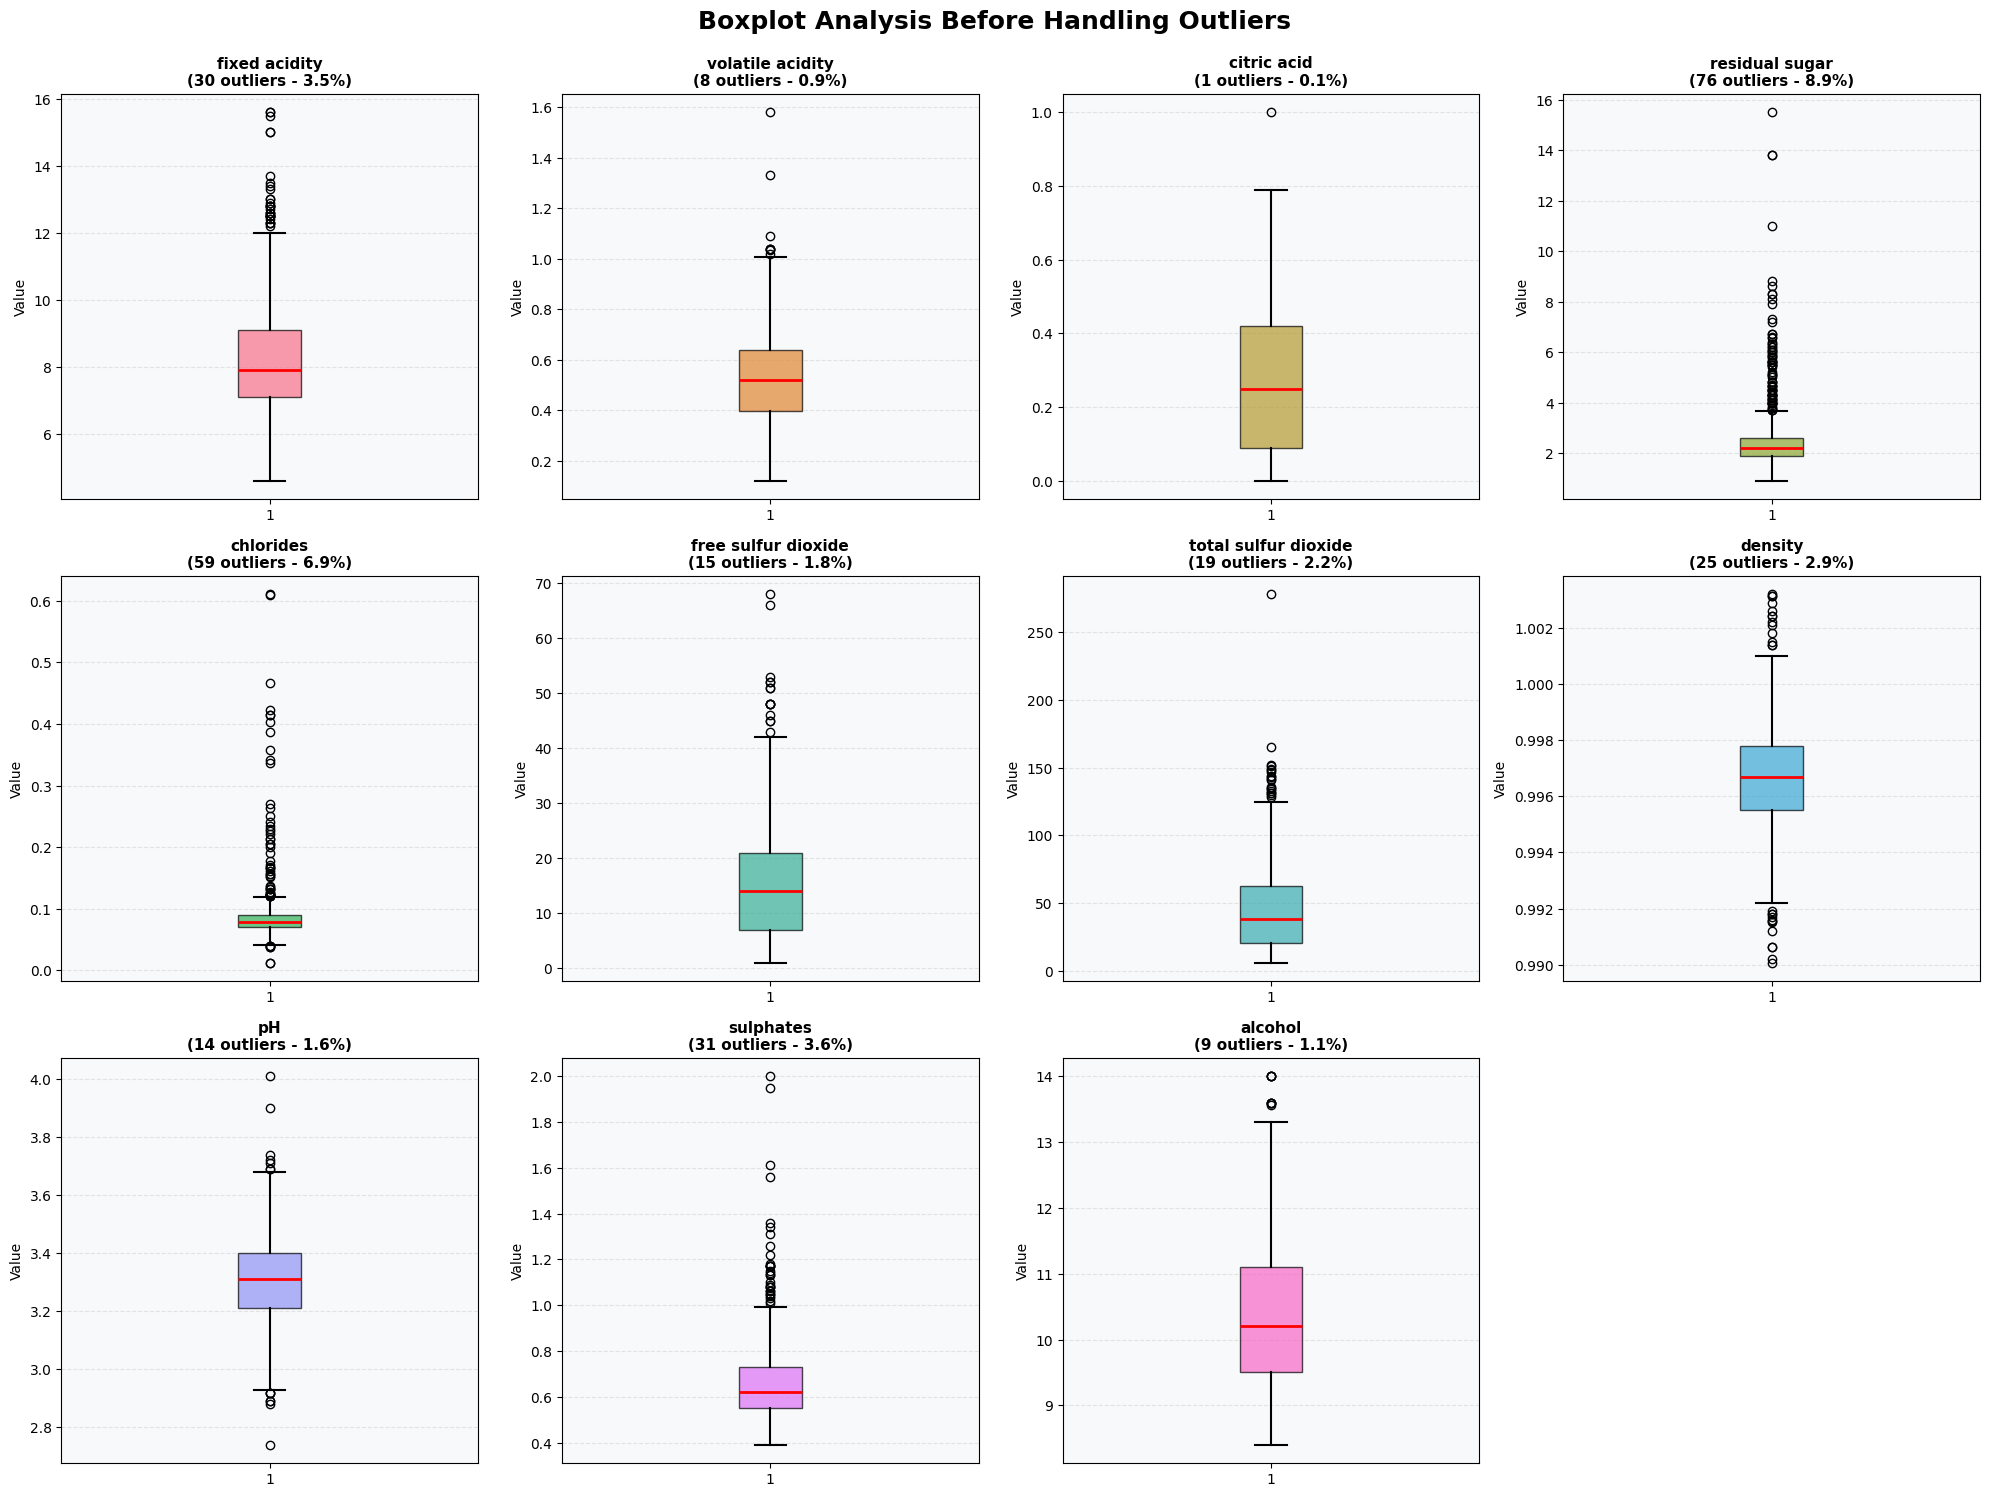

In [7]:
if len(cols) > 0:
    n_cols = 4
    n_rows = (len(cols) + 3) // 4

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    fig.suptitle('Boxplot Analysis Before Handling Outliers',
                 fontsize=18, fontweight='bold', y=0.995)

    colors = sns.color_palette('husl', len(cols))

    for idx, col in enumerate(cols):
        row = idx // n_cols
        col_idx = idx % n_cols

        bp = axes[row, col_idx].boxplot(df_labeled[col].dropna(),
                                         vert=True,
                                         patch_artist=True,
                                         boxprops=dict(facecolor=colors[idx], alpha=0.7),
                                         medianprops=dict(color='red', linewidth=2),
                                         whiskerprops=dict(color='black', linewidth=1.5),
                                         capprops=dict(color='black', linewidth=1.5))

        axes[row, col_idx].set_title(f'{col}\n({outlier_info[col]['count']} outliers - {outlier_info[col]['percentage']:.1f}%)',
                                      fontsize=11, fontweight='bold')
        axes[row, col_idx].set_ylabel('Value', fontsize=10)
        axes[row, col_idx].grid(axis='y', alpha=0.3, linestyle='--')
        axes[row, col_idx].set_facecolor('#f8f9fa')

    for idx in range(len(cols), n_rows * n_cols):
        row = idx // n_cols
        col_idx = idx % n_cols
        fig.delaxes(axes[row, col_idx])

    plt.tight_layout()
    plt.show()

From the boxplot and calculation, we can conclude that we need to handling the outlier values. We use capping method to replace the outlier values.

In [8]:
# Handling outlier using capping method
for col in cols:
    lower = outlier_info[col]['lower_bound']
    upper = outlier_info[col]['upper_bound']

    # Cap outliers
    df_labeled[col] = df_labeled[col].clip(lower=lower, upper=upper)

    #Handling outlier in unlabeled data
    if col in df_unlabeled.columns:
        df_unlabeled[col] = df_unlabeled[col].clip(lower=lower, upper=upper)

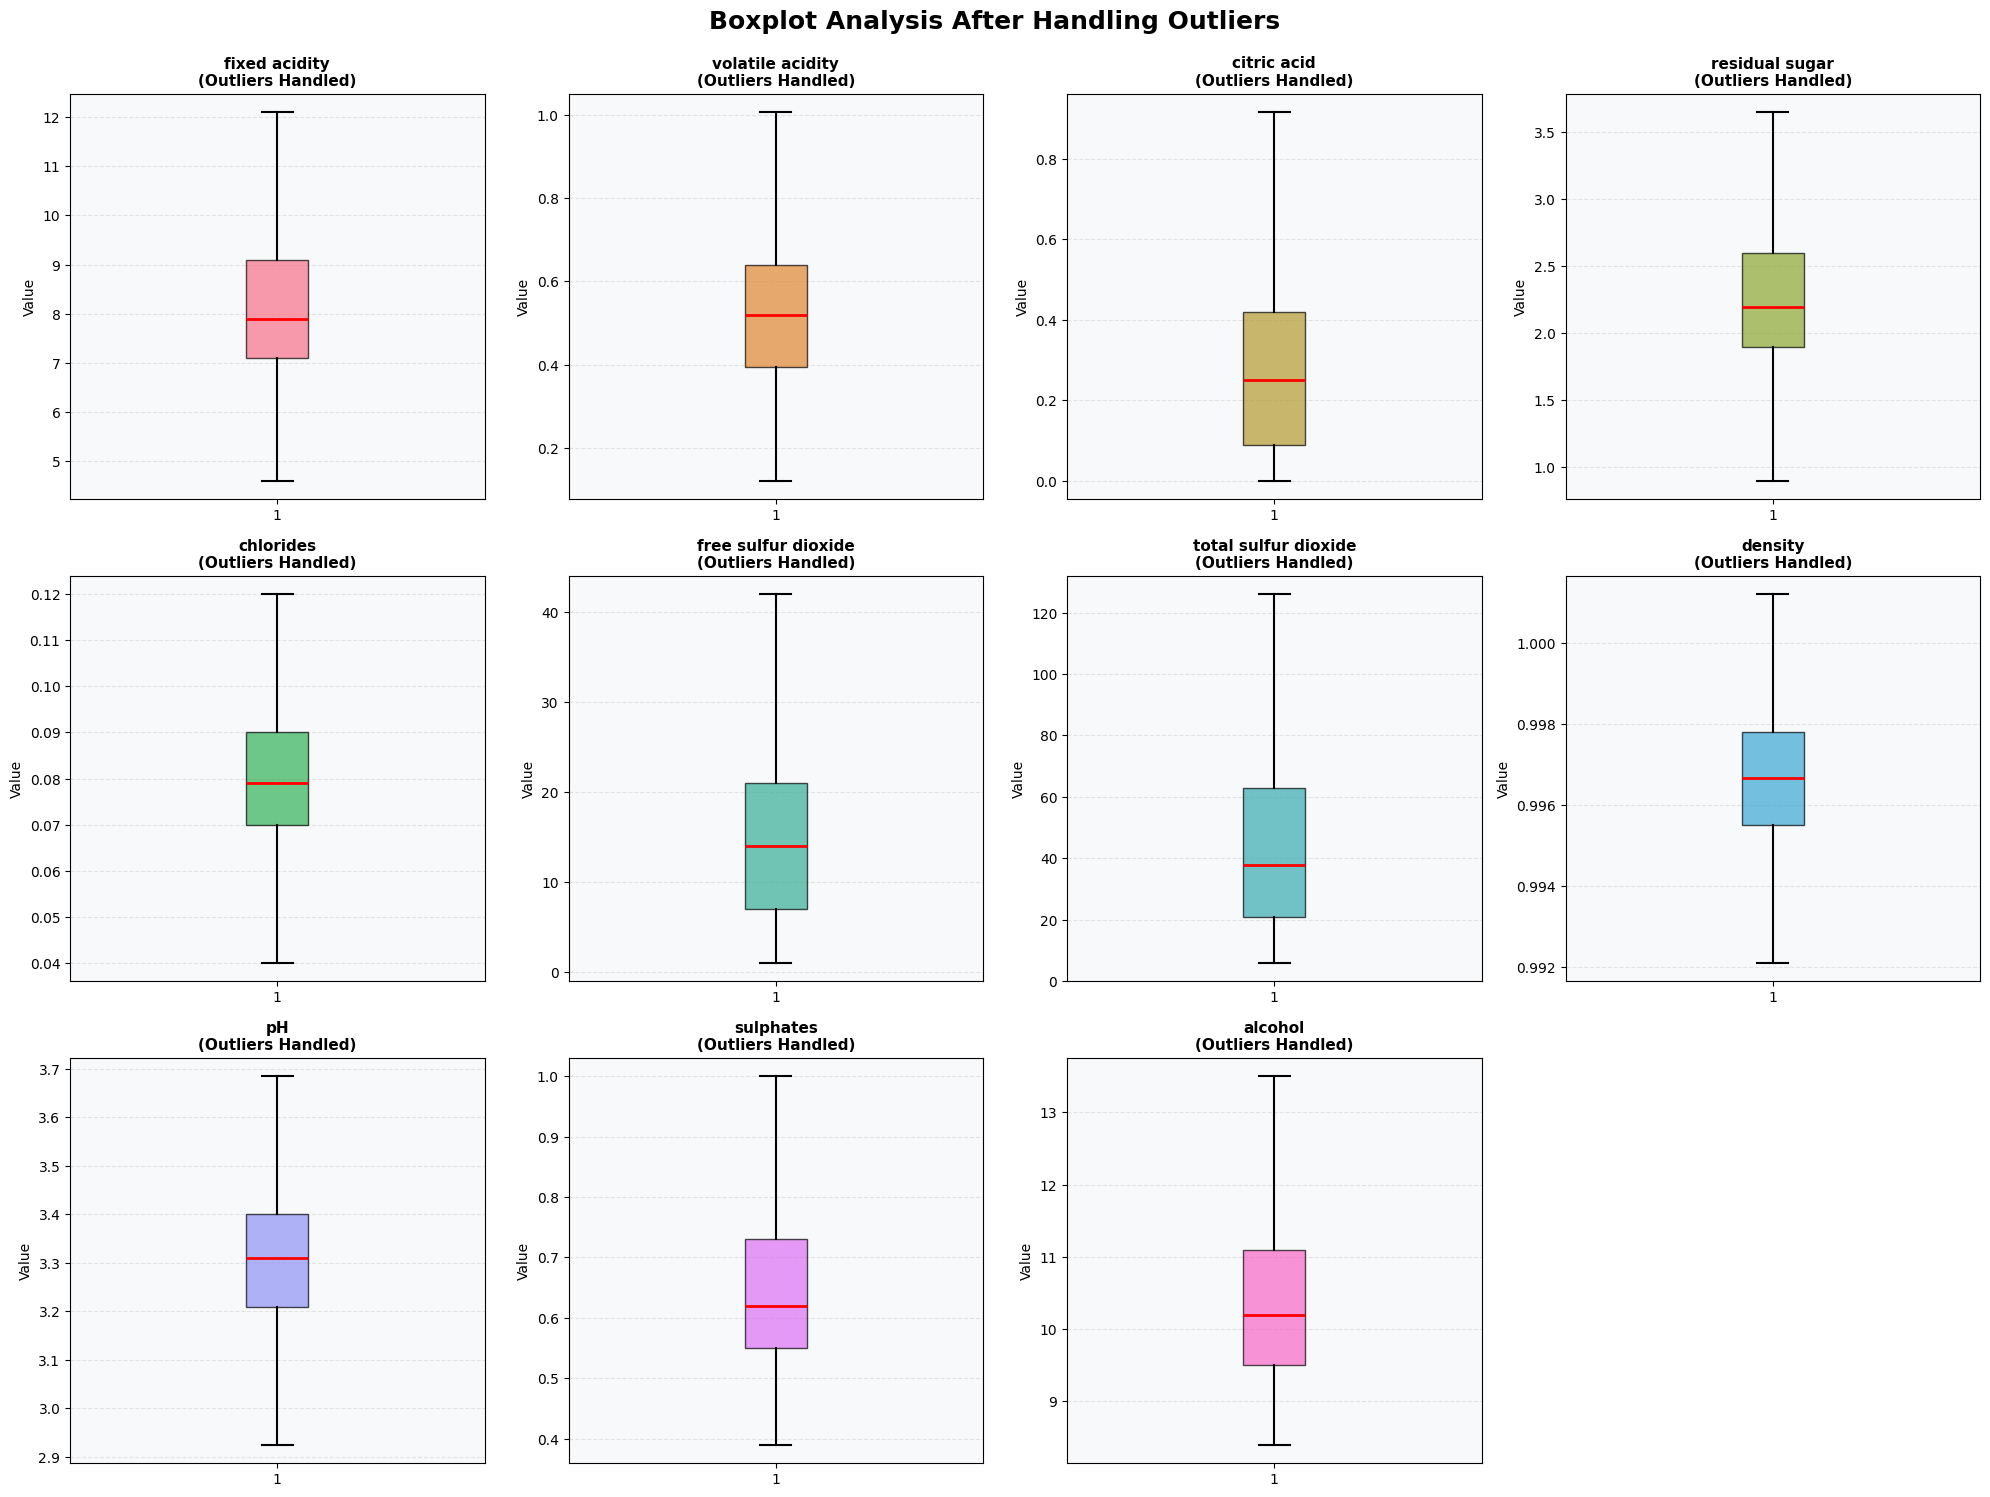

In [9]:
if len(cols) > 0:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    fig.suptitle('Boxplot Analysis After Handling Outliers',
                 fontsize=18, fontweight='bold', y=0.995)

    for idx, col in enumerate(cols):
        row = idx // n_cols
        col_idx = idx % n_cols

        bp = axes[row, col_idx].boxplot(df_labeled[col].dropna(),
                                         vert=True,
                                         patch_artist=True,
                                         boxprops=dict(facecolor=colors[idx], alpha=0.7),
                                         medianprops=dict(color='red', linewidth=2),
                                         whiskerprops=dict(color='black', linewidth=1.5),
                                         capprops=dict(color='black', linewidth=1.5))

        axes[row, col_idx].set_title(f'{col}\n(Outliers Handled)',
                                      fontsize=11, fontweight='bold')
        axes[row, col_idx].set_ylabel('Value', fontsize=10)
        axes[row, col_idx].grid(axis='y', alpha=0.3, linestyle='--')
        axes[row, col_idx].set_facecolor('#f8f9fa')

    for idx in range(len(cols), n_rows * n_cols):
        row = idx // n_cols
        col_idx = idx % n_cols
        fig.delaxes(axes[row, col_idx])

    plt.tight_layout()
    plt.show()

There is no longer outlier value after we replace it using capping method based on the boxplot analysis.

#6. Exploratory Data Analysis

In [10]:
print('\n' + '=' * 50)
print('EXPLORATORY DATA ANALYSIS (EDA)')
print('=' * 50)

print('\nData Labeled Info:')
print(df_labeled.info())


EXPLORATORY DATA ANALYSIS (EDA)

Data Labeled Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB
None


In [11]:
print('Statistical Summary: ')
display(df_labeled.describe())

Statistical Summary: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.224387,0.528092,0.267252,2.316569,0.080534,15.626604,45.483664,0.996687,3.312684,0.648810,10.427460,5.653442,813.749125
std,1.590120,0.174168,0.194792,0.591494,0.017868,9.779043,29.852671,0.001819,0.148445,0.136519,1.058068,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992100,2.925000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,12.100000,1.007500,0.915000,3.650000,0.120000,42.000000,126.000000,1.001220,3.685000,1.000000,13.500000,8.000000,1597.000000


As we can see here, the minimum and maximum of the free sulfur dioxide are 1 and 42 respectively, but the minimum and maximum of the total sulfur dioxide are 6 and 126. There are significant data differences, hence we need to do features scaling (standardization) before modelling data.

In [12]:
target_col = 'quality'
features_col = [col for col in df_labeled.columns if col not in [target_col, 'Id']]
id_col = 'Id'

print(f'\nTarget Variable Distribution ({target_col}):')
print(df_labeled[target_col].value_counts())
print('\nProportion:')
print(df_labeled[target_col].value_counts(normalize=True))


Target Variable Distribution (quality):
quality
5    362
6    341
7    109
4     26
8     13
3      6
Name: count, dtype: int64

Proportion:
quality
5    0.422404
6    0.397900
7    0.127188
4    0.030338
8    0.015169
3    0.007001
Name: proportion, dtype: float64


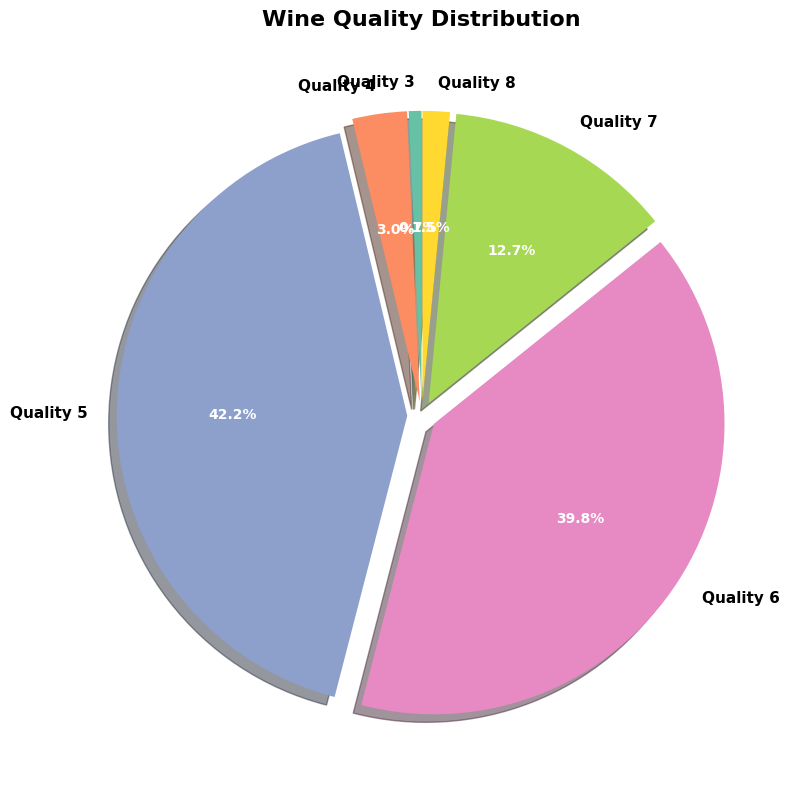

In [13]:
quality = df_labeled[target_col].value_counts().sort_index()
colors_pie = sns.color_palette('Set2', len(quality))
explode = [0.05] * len(quality)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(quality,
                                    labels=[f'Quality {i}' for i in quality.index],
                                    autopct='%1.1f%%',
                                    colors=colors_pie,
                                    explode=explode,
                                    shadow=True,
                                    startangle=90,
                                    textprops={'fontsize': 11, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

ax.set_title('Wine Quality Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

The distribution of the quality variable is unbalanced. Hence, we need to handle the imbalance class later in the training section using oversampling and undersampling test.

The following code block is designed to visualize the distribution of numerical features in your df_labeled DataFrame using histograms and Kernel Density Estimate (KDE) plots.

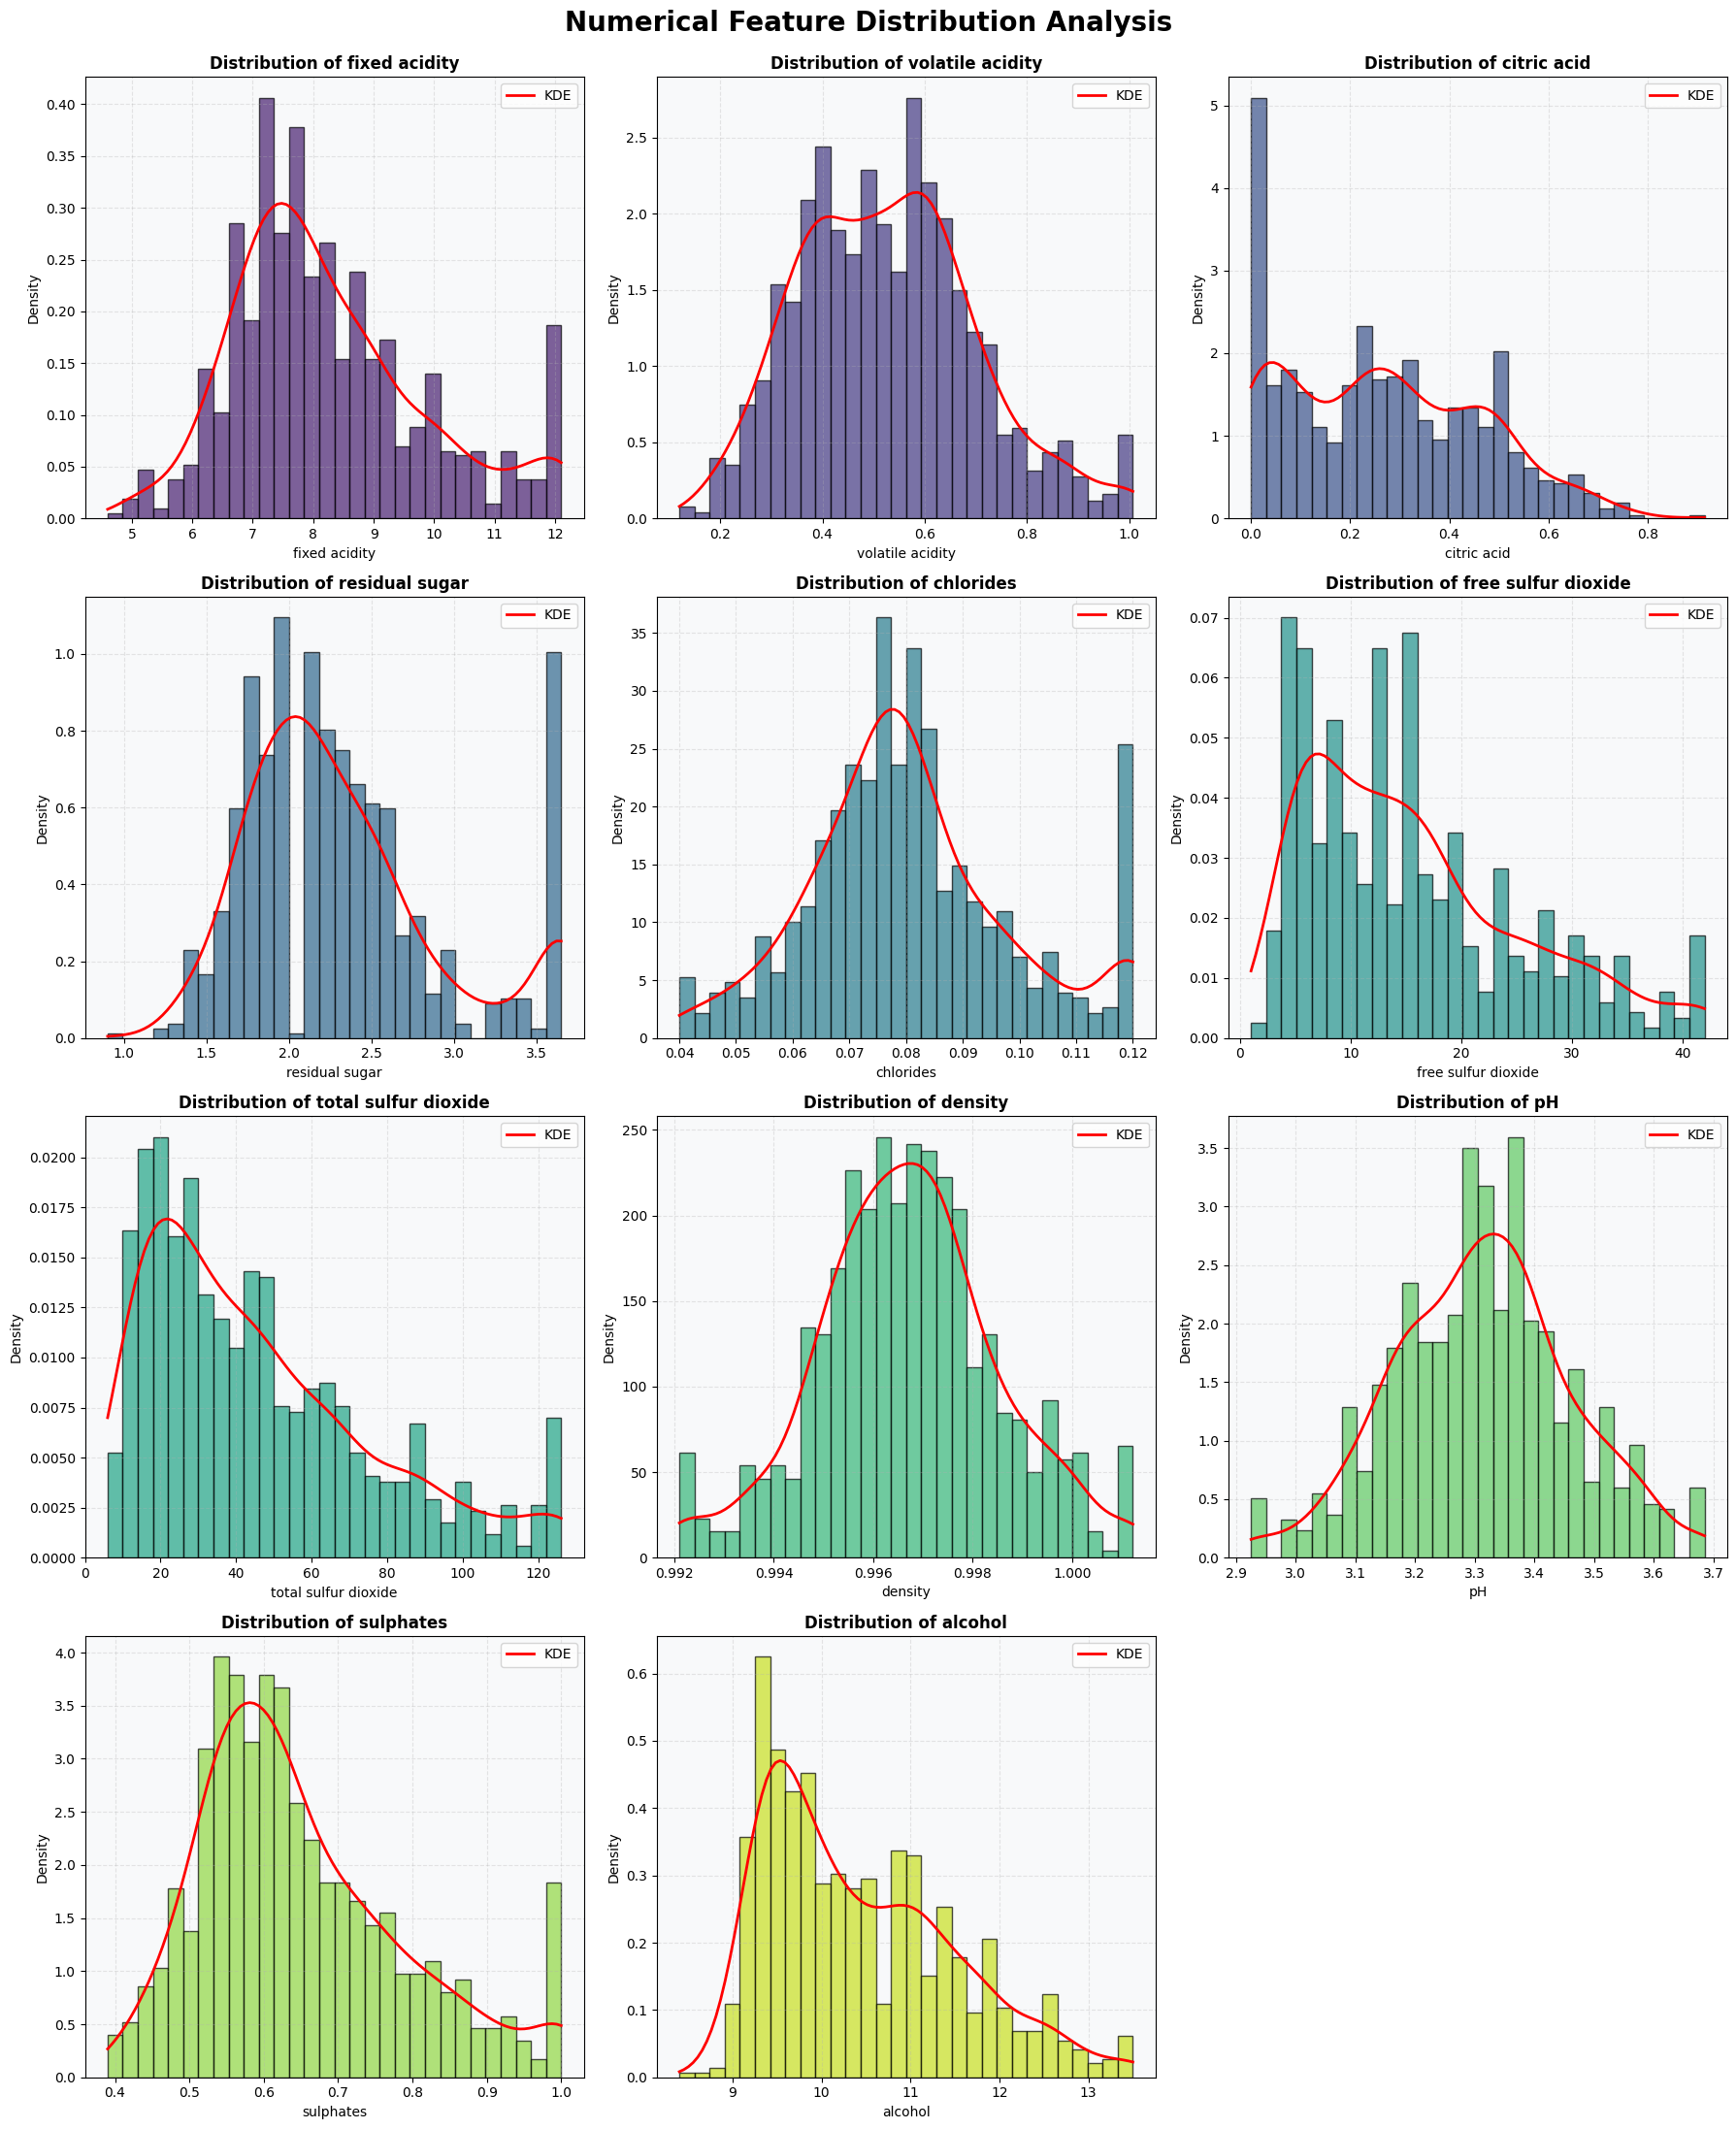

In [14]:
numeric_cols = df_labeled.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
if id_col in numeric_cols:
    numeric_cols.remove(id_col)

# Enhanced Distribution Plots
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(4, 3, figsize=(18, 22))
    fig.suptitle('Numerical Feature Distribution Analysis',
                 fontsize=20, fontweight='bold', y=0.995)
    axes_flat = axes.flatten()

    colors_dist = sns.color_palette('viridis', len(numeric_cols))

    for idx, col in enumerate(numeric_cols):
        ax = axes_flat[idx]

        ax.hist(df_labeled[col], bins=30, edgecolor='black',
                alpha=0.7, color=colors_dist[idx], density=True)

        from scipy import stats
        kde = stats.gaussian_kde(df_labeled[col].dropna())
        x_range = np.linspace(df_labeled[col].min(), df_labeled[col].max(), 100)
        ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

        ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.legend()
        ax.grid(alpha=0.3, linestyle='--')
        ax.set_facecolor('#f8f9fa')

    for idx in range(len(numeric_cols), len(axes_flat)):
        axes_flat[idx].axis('off')

    plt.tight_layout()
    plt.show()

This grid of plots shows the distribution (the 'shape') of each of the 11 numerical features in your training data. Each plot uses:

A histogram (bars) to show the count of data points in specific ranges (bins).

A KDE line (red curve) to show a smoothed estimate of the underlying distribution.

The most important takeaway is that almost none of your features are 'normally distributed' (a perfect bell curve). Most of them are right-skewed, which has significant implications for how you prepare your data for modeling.

Here is a breakdown of the distributions, grouped by their shape:

1. Symmetric / Normal Distributions
These features are 'well-behaved' and resemble a classic bell curve.


*  density: This is an almost perfect normal distribution. The data is symmetrically centered around a single peak.

* pH: This feature is also very symmetric and normally distributed, centered around a value of approximately 3.3.

2. Heavily Right-Skewed Distributions
These features have the vast majority of their values clustered on the low end, with a very long 'tail' of a few high values (outliers) to the right.

* residual sugar: Most wines have very low sugar (under 5), but a few have extremely high values, creating a long tail.

* chlorides: Very similar to residual sugar. Most values are low, with a long tail of high-value outliers.

* free sulfur dioxide: The distribution is heavily skewed, with most values clustered under 20.

3. Moderately Right-Skewed Distributions
These are the most common type in this dataset. They have a clear single peak, but the tail on the right side is noticeably longer than the tail on the left.

* fixed acidity

* volatile acidity

* total sulfur dioxide

* sulphates

* alcohol (This one is more gently skewed, but the tail is clearly to the right).

4. Special Case (Bimodal / Zero-Inflated)
* citric acid: This distribution is unique. It appears to be bimodal (two peaks), or at least zero-inflated. There is a large spike of wines with a citric acid value of or near 0, and then a second, wider hump of wines centered around 0.5. This suggests there might be two distinct types of wine in this dataset (those with citric acid added/present, and those without).

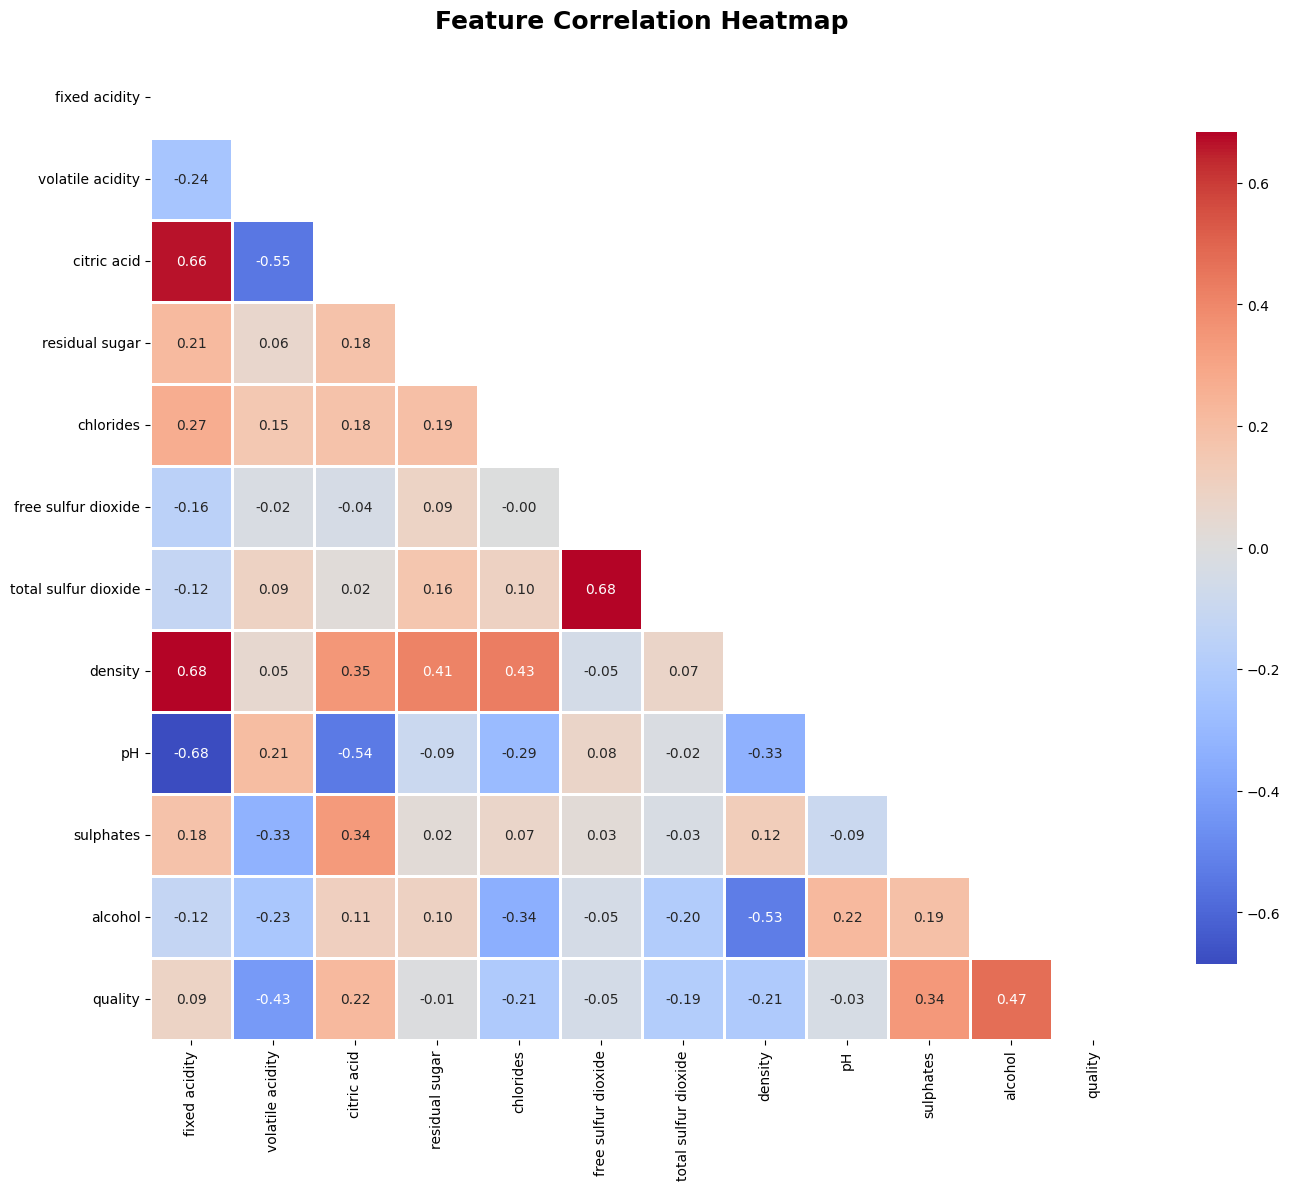

In [15]:
plt.figure(figsize=(14, 12))
corr_matrix = df_labeled[features_col + [target_col]].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'shrink': 0.8},
            mask=mask)

plt.title('Feature Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

From the correlation heatmap, we can see that alcohol is the one who has the biggest effect to the target variable, since it has 0.47 correlation. It means that the higher alcohol content, the better quality of the wine.

#7. Train-Validation Split

The following code is to split the labeled dataset into training and validation:

In [16]:
print('\n' + '=' * 50)
print('Train-Validation Split')
print('=' * 50)

from sklearn.model_selection import train_test_split

X = df_labeled[features_col]
y = df_labeled[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')


Train-Validation Split
X_train shape: (685, 11)
y_train shape: (685,)
X_val shape: (172, 11)
y_val shape: (172,)


The ratio that we used in this model of splitting is 80% to training data and 20% to validation data. We also split the feature and target variable.

The following code is to standardize of the data using StandardScaler:

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_unlabeled_scaled = scaler.transform(df_unlabeled[features_col])

We apply fit_transform to data training and transform to data validation and testing to avoid the data leakage.

We plot and calculate the quality distribution once again to train dataset to make sure the imbalance class phenomenon.

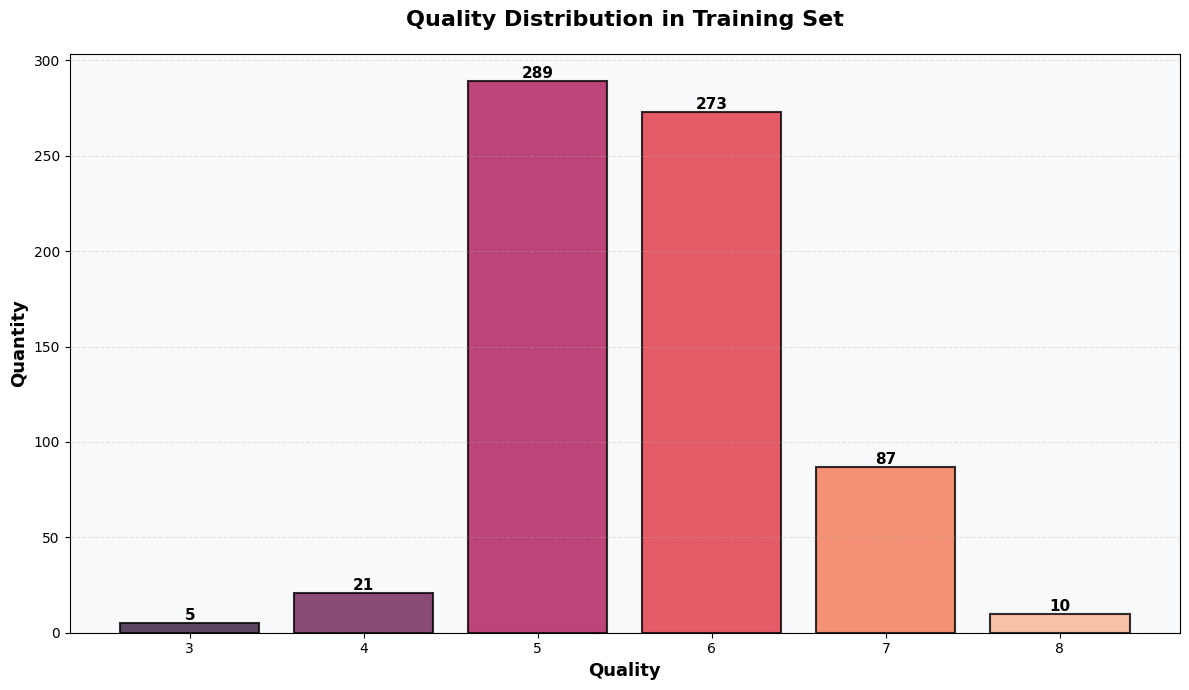

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
quality_counts = y_train.value_counts().sort_index()
colors_bar = sns.color_palette('rocket', len(quality_counts))

bars = ax.bar(quality_counts.index, quality_counts.values,
              color=colors_bar, edgecolor='black', linewidth=1.5, alpha=0.8)

ax.set_title('Quality Distribution in Training Set',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quality', fontsize=13, fontweight='bold')
ax.set_ylabel('Quantity', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_facecolor('#f8f9fa')

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [19]:
print('\nQuality Distribution (y_train):')
print(y_train.value_counts(normalize=True))


Quality Distribution (y_train):
quality
5    0.421898
6    0.398540
7    0.127007
4    0.030657
8    0.014599
3    0.007299
Name: proportion, dtype: float64


Thus, it still has the different proportion of the quality distribution. We will proceed to handle the imbalance class phenomenon.

Since XGBoost must has label start from 0, we map the label from 3-8 to 0-5.

In [20]:
print('\n--- Customizing Target Labels (Mapping 3-8 to 0-5) ---')
label_map_to_zero = y_train.min()
n_classes = len(y_train.unique())
print(f'Original label: {sorted(y_train.unique())}')
print(f'Total classes: {n_classes}')

y_train_mapped = y_train.map(lambda x: x - label_map_to_zero)
y_val_mapped = y_val.map(lambda x: x - label_map_to_zero)

print(f'New label: {sorted(y_train_mapped.unique())}')


--- Customizing Target Labels (Mapping 3-8 to 0-5) ---
Original label: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Total classes: 6
New label: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


# 8. Handling Imbalance Class

In this section we will do oversampling test using SMOTE and undersampling test using RandomUnderSampler from imblearn library.

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

We will do SMOTE and RandomUnderSampler to train dataset to avoid data leakage.

In [22]:
print('=' * 50)
print('Handling Imbalance Class')
print('=' * 50)

#Oversampling Test
min_class_size = y_train_mapped.value_counts().min()
k_neighbors_smote = max(1, min_class_size-1)

smote = SMOTE(k_neighbors=k_neighbors_smote, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_mapped)
print(f'X_train_smote shape: {X_train_smote.shape}')
print(f'y_train_smote shape: {y_train_smote.shape}')

#Undersampling (Random)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train_mapped)
print(f'X_train_rus shape: {X_train_rus.shape}')
print(f'y_train_rus shape: {y_train_rus.shape}')

datasets = {
        'Original_Scaled': (X_train_scaled, y_train_mapped),
        'SMOTE': (X_train_smote, y_train_smote),
        'RUS': (X_train_rus, y_train_rus)
        }

Handling Imbalance Class
X_train_smote shape: (1734, 11)
y_train_smote shape: (1734,)
X_train_rus shape: (30, 11)
y_train_rus shape: (30,)


As we can see here, the rows of X_train dataframe after SMOTE are 1734 which means oversampling added the lower number of quality to have the equal distribution of quality. Otherwise, undersampling removed the higher number of quality to have the same number of quality as the lower number of quality.

The following code below is used to plot the comparison of the distribution of the quality after oversampling and undersampling tests.


Distribution of Classes


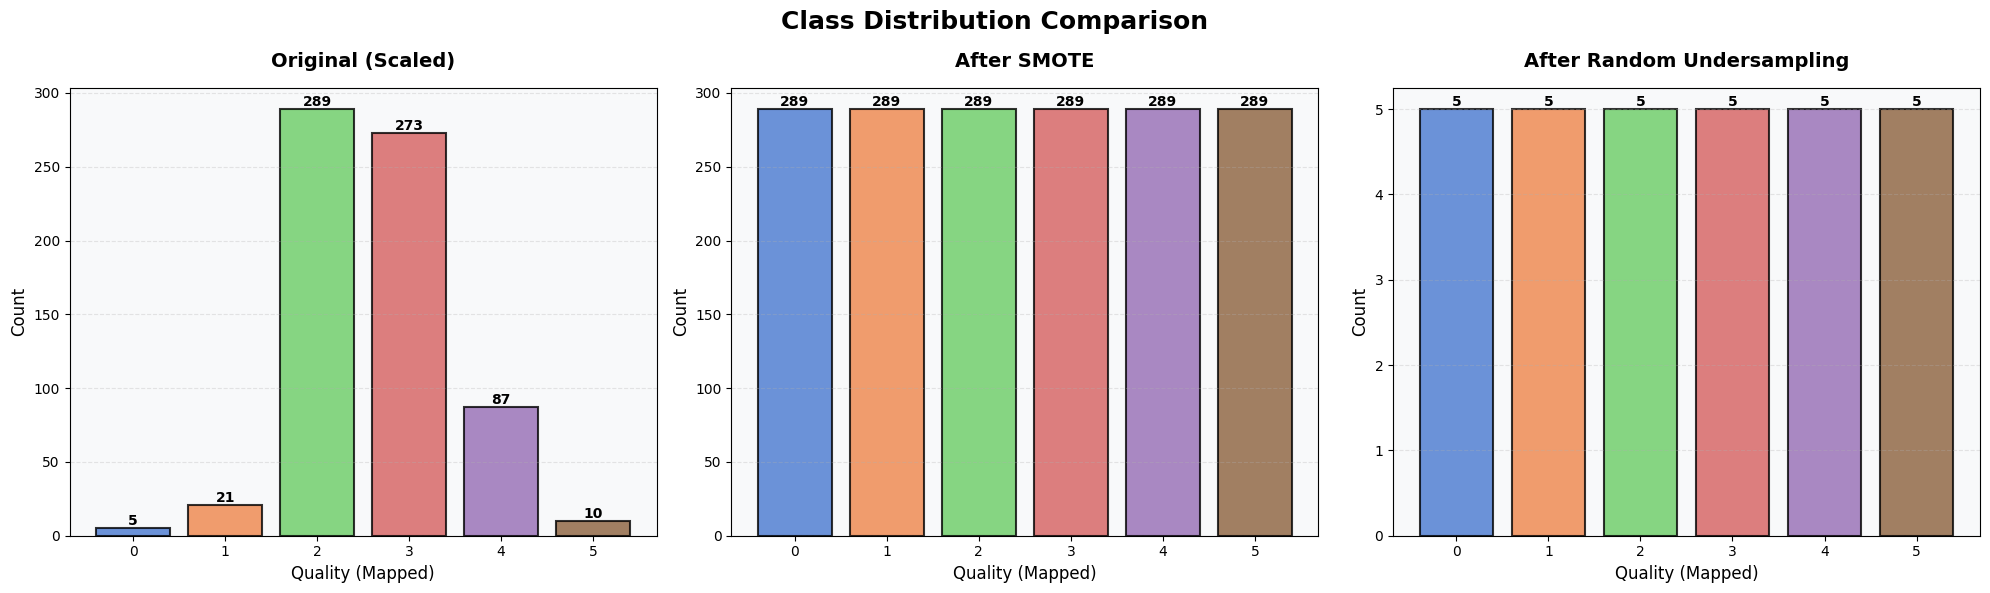

In [23]:
print('\n' + '=' * 50)
print('Distribution of Classes')
print('=' * 50)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Class Distribution Comparison', fontsize=18, fontweight='bold')

datasets_plot = [
    (y_train_mapped, 'Original (Scaled)', axes[0]),
    (y_train_smote, 'After SMOTE', axes[1]),
    (y_train_rus, 'After Random Undersampling', axes[2])
]

colors_comparison = sns.color_palette('muted', n_classes)

for y_data, title, ax in datasets_plot:
    counts = y_data.value_counts().sort_index()
    bars = ax.bar(counts.index, counts.values,
                  color=colors_comparison, edgecolor='black',
                  linewidth=1.5, alpha=0.8)

    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Quality (Mapped)', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_facecolor('#f8f9fa')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Oversampling test makes all the quality has the same number as the highest number of quality. Otherwise, undersampling test makes all the quality has the same number as the lowest number of quality.

#9. Training and Validating Data with Hyperparameter Tuning

The following code is to train and validate data using Random Forest, XGBoost, and SVM with hyperparameter tuning then leave the best model of tuning.

In [24]:
print('\n' + '=' * 50)
print('Training and Validating with Hyperparameter Tuning')
print('=' * 50)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grids = {
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    }
}

base_models = {
    'XGBoost': XGBClassifier(random_state=42, objective='multi:softmax',
                             num_class=n_classes, use_label_encoder=False,
                             eval_metric='mlogloss'),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

tuned_models = {}
tuning_results = []

for data_name, (X_t, y_t) in datasets.items():
    print(f'\n{'='*50}')
    print(f'Tuning on Dataset: {data_name}')
    print(f'{'='*50}')

    for model_name in base_models.keys():
        print(f'\nTuning {model_name}...')

        grid_search = GridSearchCV(
            estimator=base_models[model_name],
            param_grid=param_grids[model_name],
            cv=3,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_t, y_t)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        tuned_models[f'{model_name}_{data_name}'] = best_model

        print(f'\nBest parameters for {model_name} on {data_name}:')
        print(best_params)
        print(f'Best CV Score: {best_score:.4f}')

        tuning_results.append({
            'Model': model_name,
            'Dataset': data_name,
            'CV_Score': best_score,
            'Parameters': str(best_params)
        })

df_tuning = pd.DataFrame(tuning_results)
print('\n' + '=' * 50)
print('Hyperparameter Tuning Results Summary')
print('=' * 50)
print(df_tuning.to_string(index=False))


Training and Validating with Hyperparameter Tuning

Tuning on Dataset: Original_Scaled

Tuning XGBoost...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best parameters for XGBoost on Original_Scaled:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best CV Score: 0.5941

Tuning RandomForest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters for RandomForest on Original_Scaled:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.6116

Tuning SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best parameters for SVM on Original_Scaled:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.5927

Tuning on Dataset: SMOTE

Tuning XGBoost...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best parameters for XGBoost on SMOTE:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimator

#10. Training and Validation with Tuned Models

After hyperparameter tuning, we use the best model before training, for example in XGBoost model in original dataset we use the hyper parameter {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}.


Training with tuned models
Dataset: Original_Scaled
Training size: (685, 11)

Training XGBoost with tuned parameters...

Results for XGBoost (Original_Scaled):
Accuracy = 0.5930

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.66      0.77      0.71        73
           6       0.56      0.57      0.57        68
           7       0.43      0.27      0.33        22
           8       1.00      0.33      0.50         3

    accuracy                           0.59       172
   macro avg       0.44      0.32      0.35       172
weighted avg       0.57      0.59      0.58       172



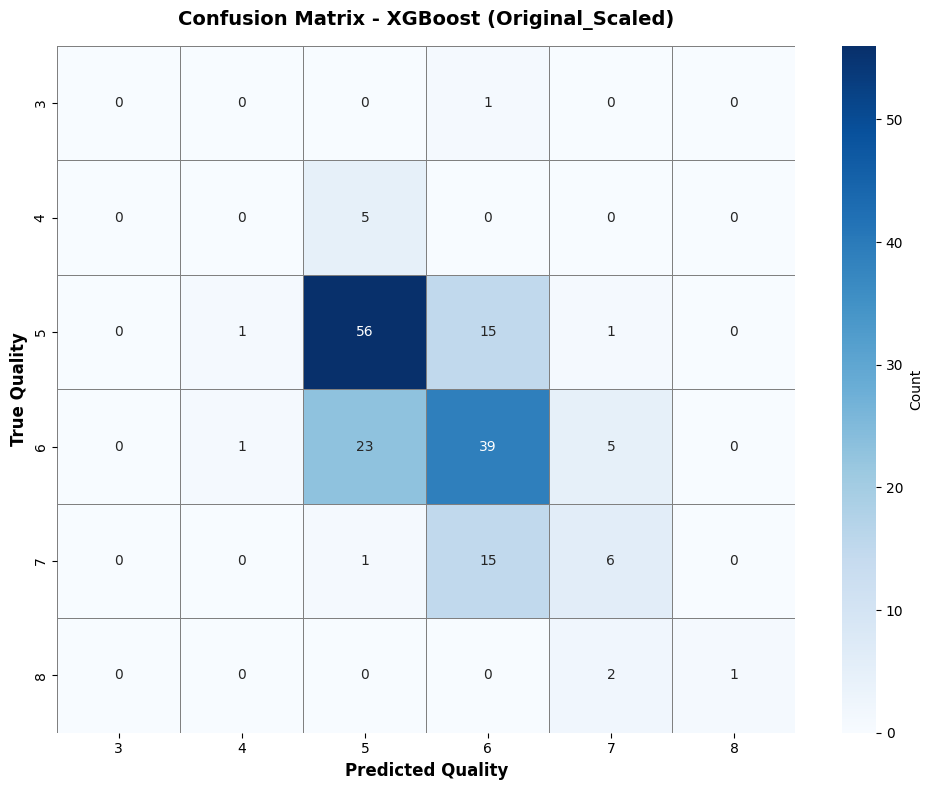


Training RandomForest with tuned parameters...

Results for RandomForest (Original_Scaled):
Accuracy = 0.6279

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.67      0.79      0.72        73
           6       0.58      0.62      0.60        68
           7       0.58      0.32      0.41        22
           8       1.00      0.33      0.50         3

    accuracy                           0.63       172
   macro avg       0.47      0.34      0.37       172
weighted avg       0.61      0.63      0.61       172



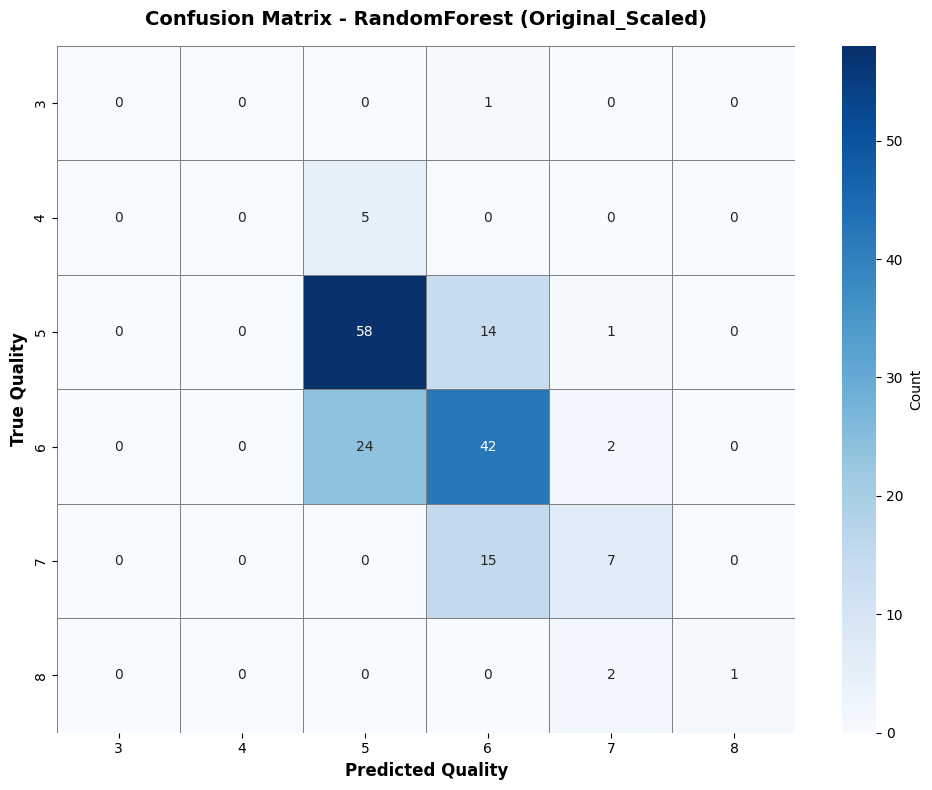


Training SVM with tuned parameters...

Results for SVM (Original_Scaled):
Accuracy = 0.5930

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.66      0.78      0.71        73
           6       0.53      0.57      0.55        68
           7       0.50      0.27      0.35        22
           8       0.00      0.00      0.00         3

    accuracy                           0.59       172
   macro avg       0.28      0.27      0.27       172
weighted avg       0.55      0.59      0.57       172



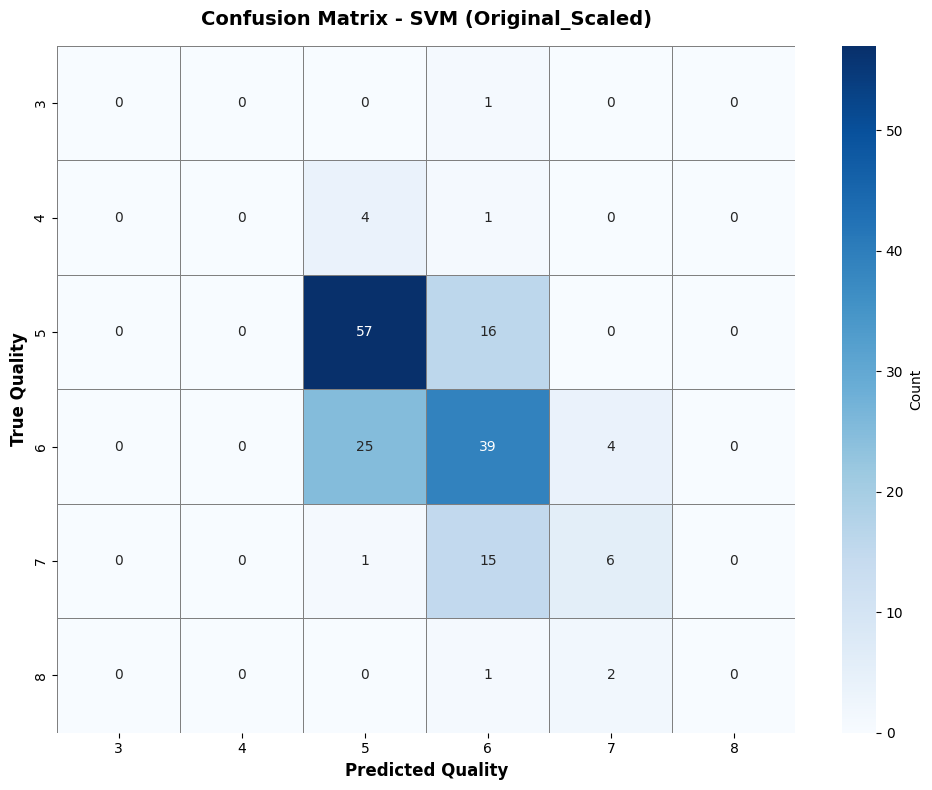

Dataset: SMOTE
Training size: (1734, 11)

Training XGBoost with tuned parameters...

Results for XGBoost (SMOTE):
Accuracy = 0.5930

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.68      0.71      0.69        73
           6       0.57      0.57      0.57        68
           7       0.50      0.45      0.48        22
           8       1.00      0.33      0.50         3

    accuracy                           0.59       172
   macro avg       0.46      0.35      0.37       172
weighted avg       0.59      0.59      0.59       172



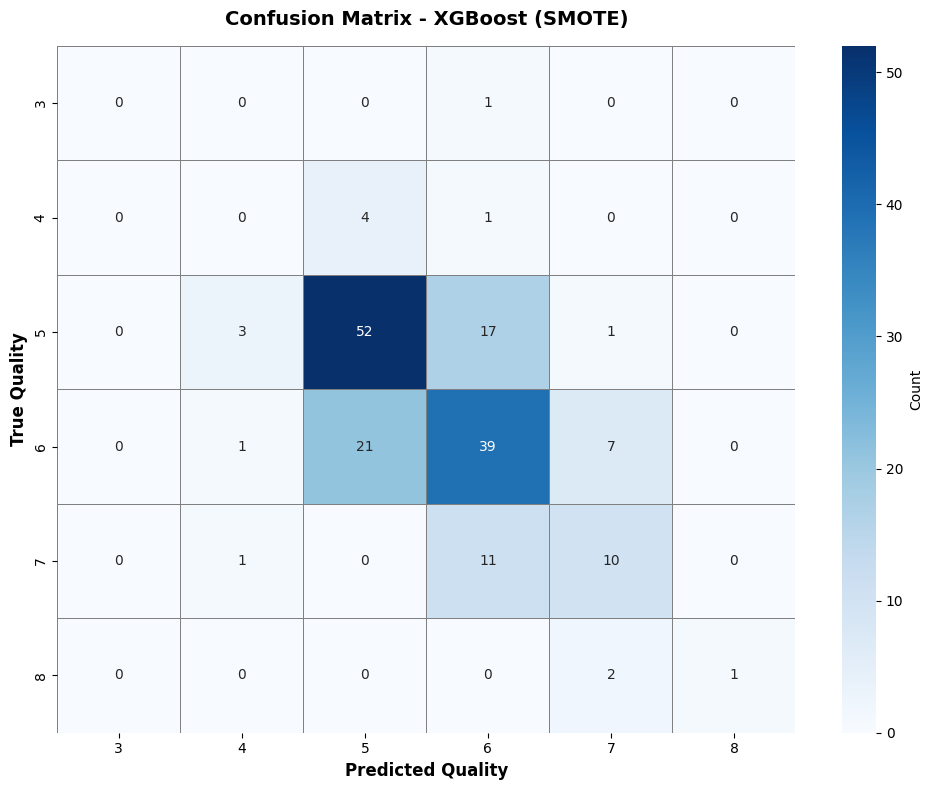


Training RandomForest with tuned parameters...

Results for RandomForest (SMOTE):
Accuracy = 0.5988

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.70      0.78      0.74        73
           6       0.57      0.53      0.55        68
           7       0.41      0.41      0.41        22
           8       1.00      0.33      0.50         3

    accuracy                           0.60       172
   macro avg       0.45      0.34      0.37       172
weighted avg       0.59      0.60      0.59       172



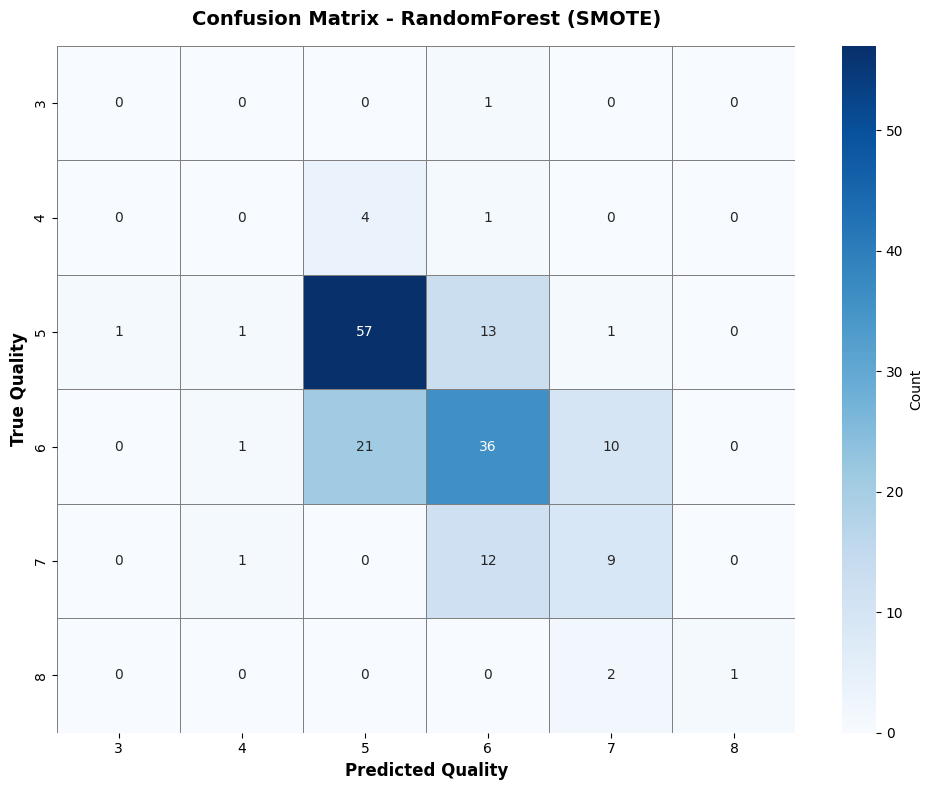


Training SVM with tuned parameters...

Results for SVM (SMOTE):
Accuracy = 0.5930

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.71      0.68      0.70        73
           6       0.55      0.62      0.58        68
           7       0.47      0.41      0.44        22
           8       1.00      0.33      0.50         3

    accuracy                           0.59       172
   macro avg       0.46      0.34      0.37       172
weighted avg       0.60      0.59      0.59       172



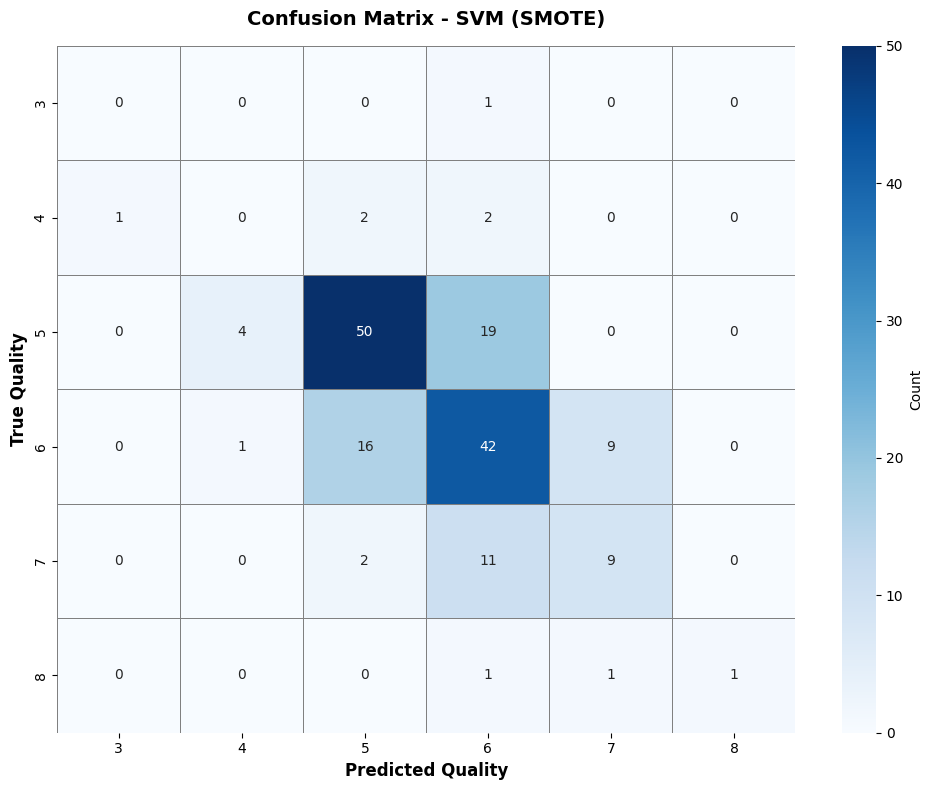

Dataset: RUS
Training size: (30, 11)

Training XGBoost with tuned parameters...

Results for XGBoost (RUS):
Accuracy = 0.2093

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.03      0.20      0.05         5
           5       0.72      0.25      0.37        73
           6       0.29      0.18      0.22        68
           7       0.40      0.18      0.25        22
           8       0.03      0.33      0.05         3

    accuracy                           0.21       172
   macro avg       0.24      0.19      0.16       172
weighted avg       0.47      0.21      0.28       172



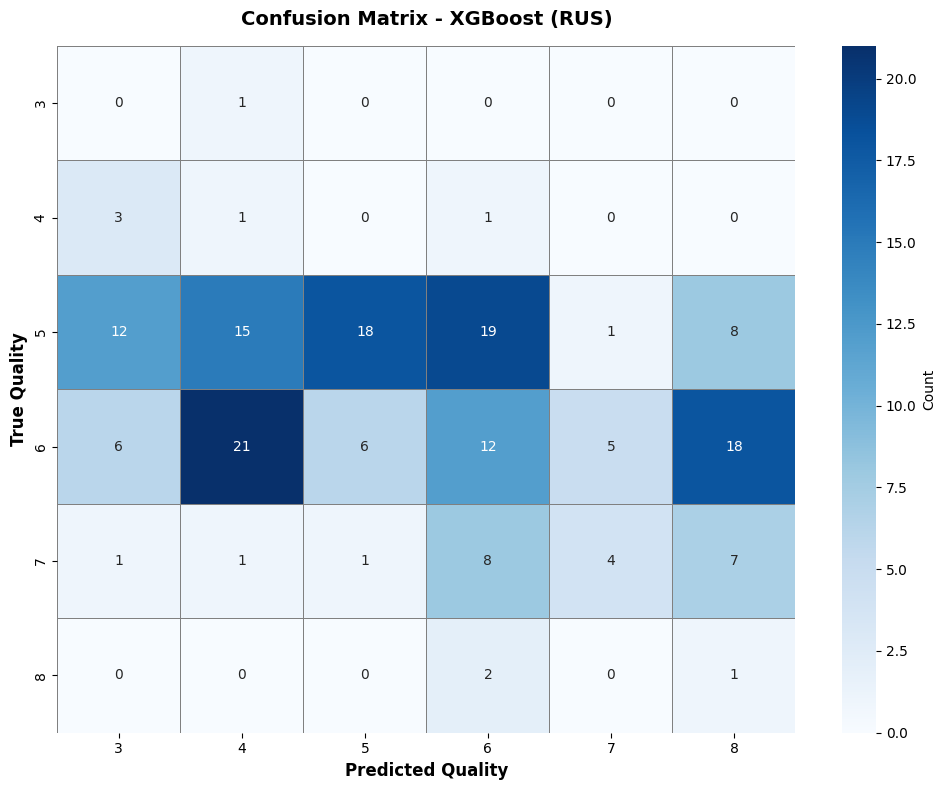


Training RandomForest with tuned parameters...

Results for RandomForest (RUS):
Accuracy = 0.2384

Classification Report:
              precision    recall  f1-score   support

           3       0.04      1.00      0.08         1
           4       0.00      0.00      0.00         5
           5       0.74      0.27      0.40        73
           6       0.34      0.24      0.28        68
           7       0.23      0.14      0.17        22
           8       0.04      0.33      0.07         3

    accuracy                           0.24       172
   macro avg       0.23      0.33      0.17       172
weighted avg       0.48      0.24      0.30       172



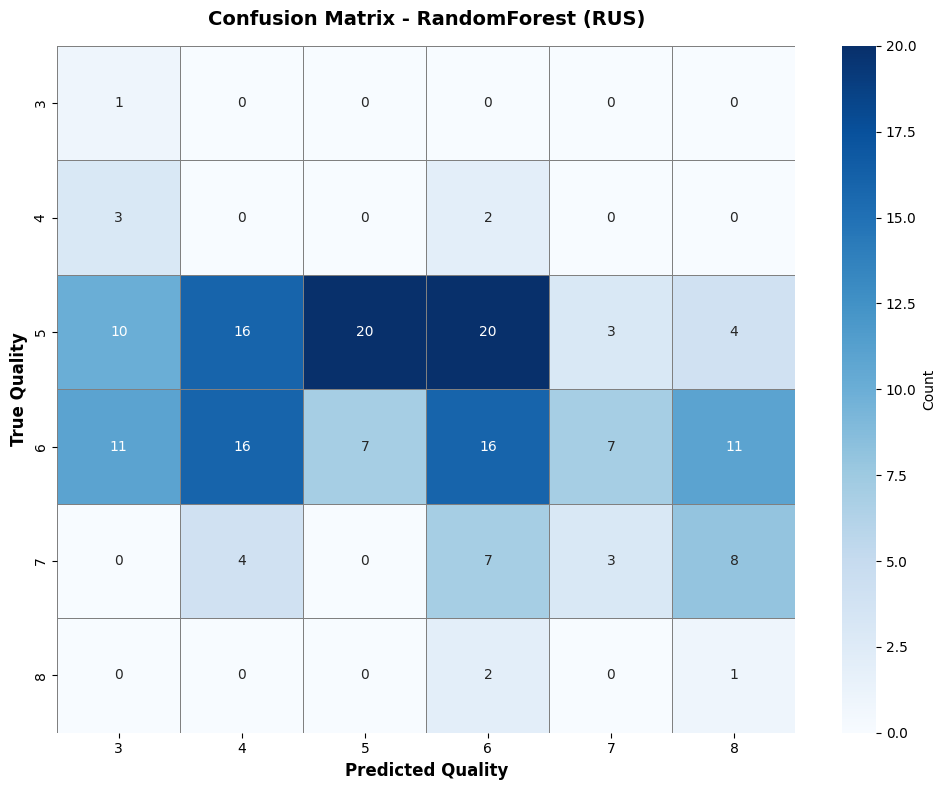


Training SVM with tuned parameters...

Results for SVM (RUS):
Accuracy = 0.2791

Classification Report:
              precision    recall  f1-score   support

           3       0.04      1.00      0.07         1
           4       0.00      0.00      0.00         5
           5       0.79      0.26      0.39        73
           6       0.39      0.34      0.36        68
           7       0.21      0.18      0.20        22
           8       0.06      0.33      0.10         3

    accuracy                           0.28       172
   macro avg       0.25      0.35      0.19       172
weighted avg       0.52      0.28      0.34       172



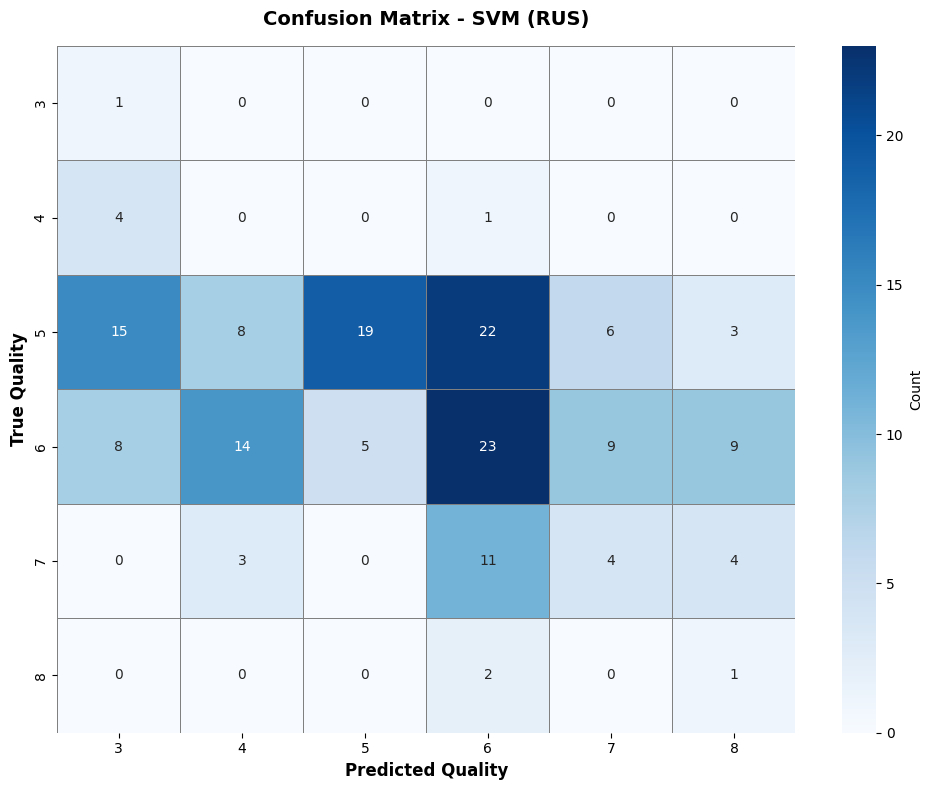

In [25]:
print('\n' + '=' * 50)
print('Training with tuned models')
print('=' * 50)

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_curve, auc)
from sklearn.preprocessing import label_binarize
from itertools import cycle

results = {}
trained_models_list = []

X_val_final = X_val_scaled
y_val_final = y_val_mapped

for data_name, (X_t, y_t) in datasets.items():
    print('='*50)
    print(f'Dataset: {data_name}')
    print(f'Training size: {X_t.shape}')
    print('='*50)

    for model_name in base_models.keys():
        model_key = f'{model_name}_{data_name}'
        model_instance = tuned_models[model_key]

        print(f'\nTraining {model_name} with tuned parameters...')

        # Predict
        y_pred = model_instance.predict(X_val_final)
        y_pred_proba = model_instance.predict_proba(X_val_final)

        # Calculate metrics
        accuracy = accuracy_score(y_val_final, y_pred)

        full_model_name = f'{model_name} ({data_name})'
        trained_models_list.append({
            'name': full_model_name,
            'accuracy': accuracy,
            'model': model_instance,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        })

        print(f'\nResults for {full_model_name}:')
        print(f'Accuracy = {accuracy:.4f}')
        print(f'\nClassification Report:')
        target_names_original = [str(i + label_map_to_zero)
                                for i in sorted(y_val_mapped.unique())]
        print(classification_report(y_val_final, y_pred,
                                   target_names=target_names_original,
                                   zero_division=0))

        # Enhanced Confusion Matrix
        cm = confusion_matrix(y_val_final, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=target_names_original,
                   yticklabels=target_names_original,
                   cbar_kws={'label': 'Count'},
                   linewidths=0.5, linecolor='gray')
        plt.title(f'Confusion Matrix - {full_model_name}',
                 fontsize=14, fontweight='bold', pad=15)
        plt.xlabel('Predicted Quality', fontsize=12, fontweight='bold')
        plt.ylabel('True Quality', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()

        print('='*50)

These are the classification report of the prediction in validation dataset. We will proceed to ROC-AUC Analysis and sorted the best model.

#11. ROC-AUC Analysis


ROC-AUC ANALYSIS

Plotting ROC curves for XGBoost (Original_Scaled)...


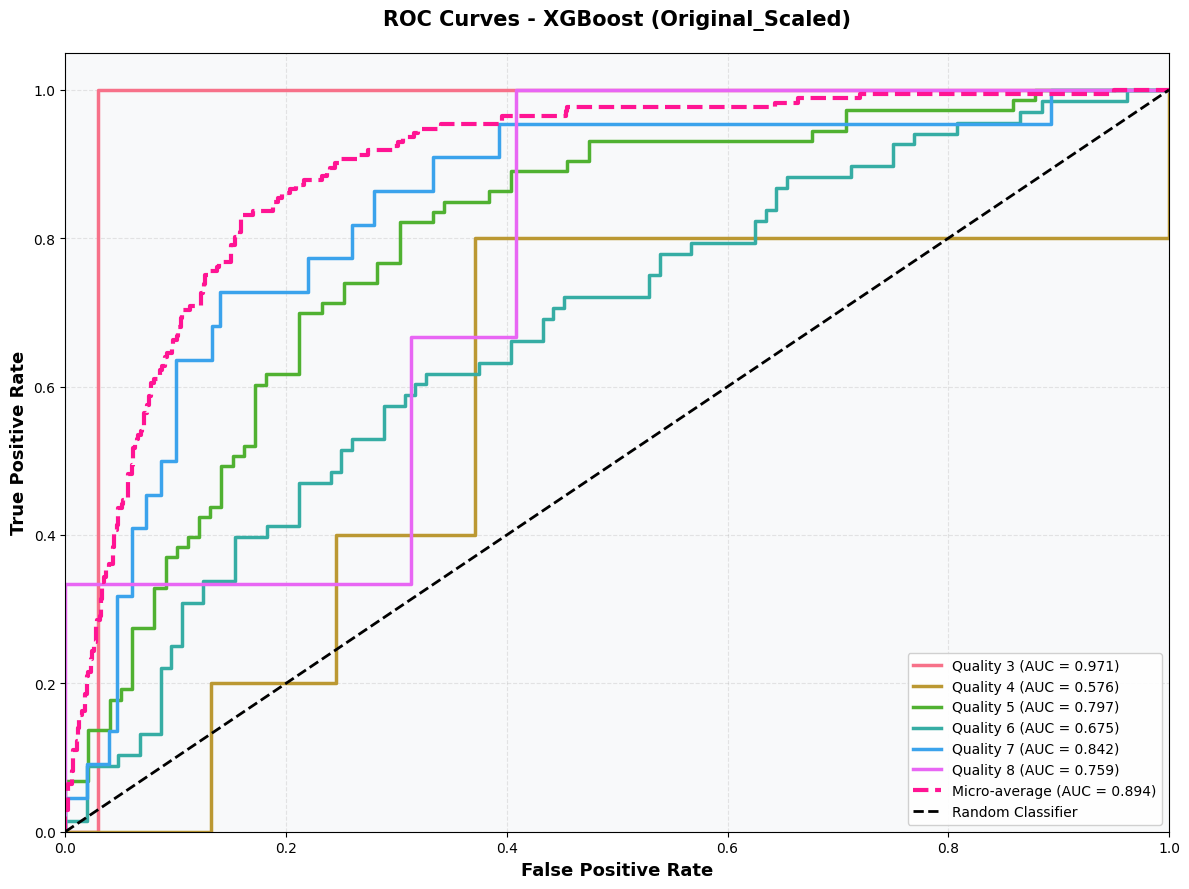


AUC Scores for XGBoost (Original_Scaled):
  Quality 3: 0.9708
  Quality 4: 0.5760
  Quality 5: 0.7973
  Quality 6: 0.6751
  Quality 7: 0.8418
  Quality 8: 0.7594
  Micro-average: 0.8943
  Macro-average: 0.7701

Plotting ROC curves for RandomForest (Original_Scaled)...


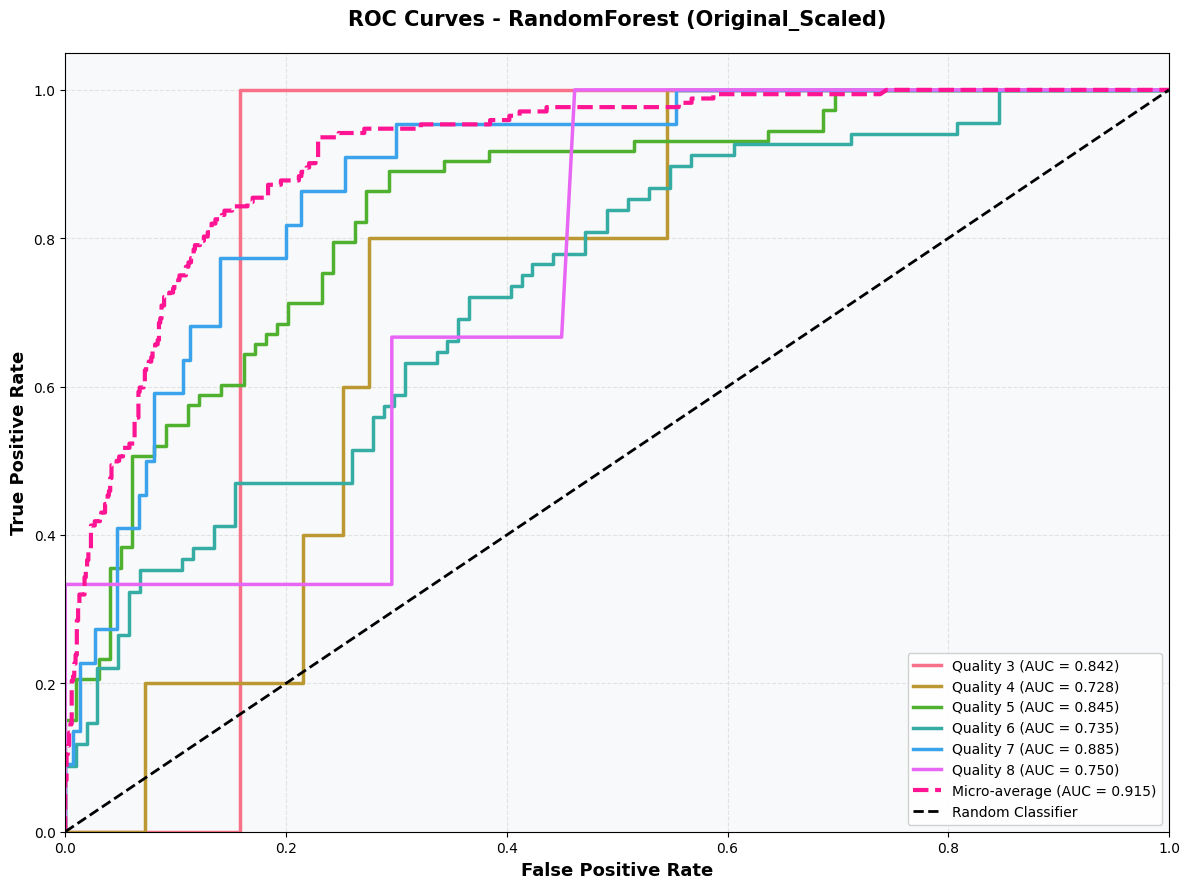


AUC Scores for RandomForest (Original_Scaled):
  Quality 3: 0.8421
  Quality 4: 0.7281
  Quality 5: 0.8453
  Quality 6: 0.7347
  Quality 7: 0.8855
  Quality 8: 0.7495
  Micro-average: 0.9145
  Macro-average: 0.7975

Plotting ROC curves for SVM (Original_Scaled)...


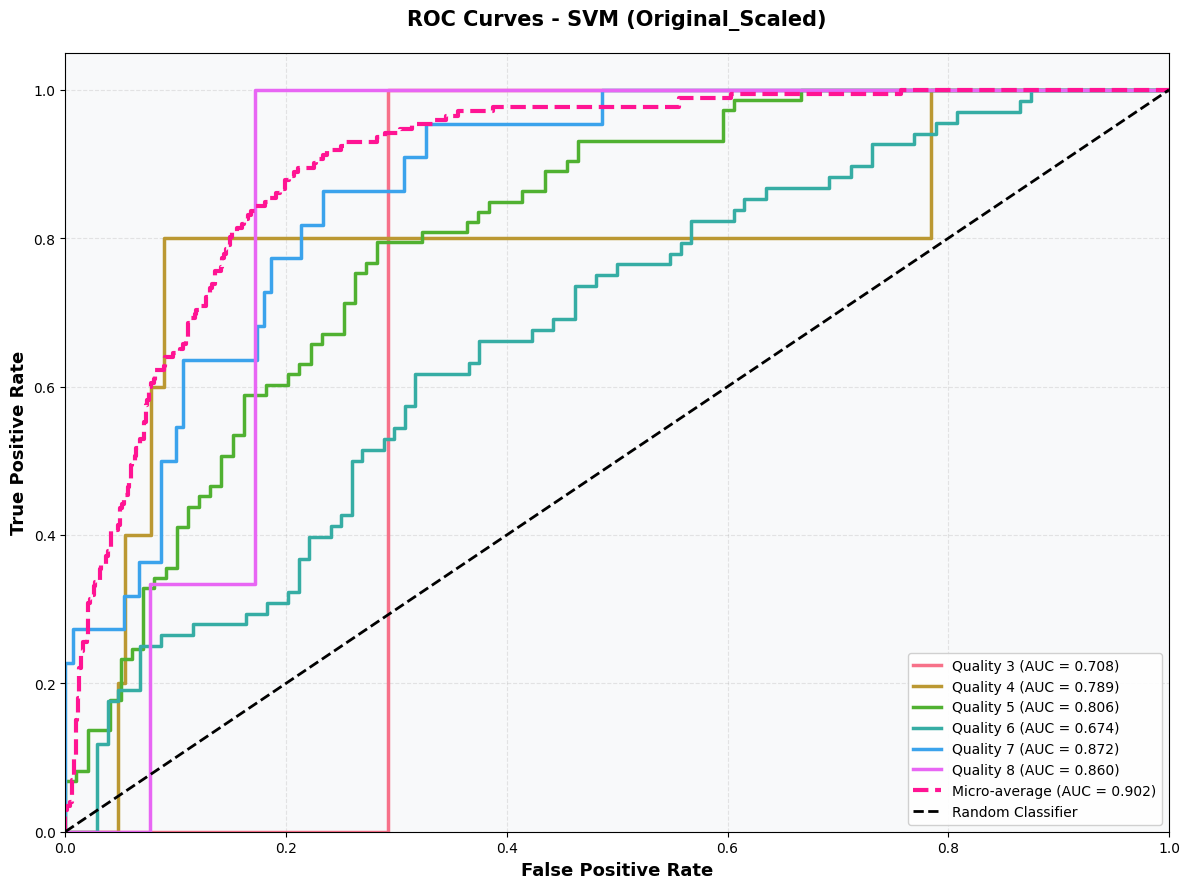


AUC Scores for SVM (Original_Scaled):
  Quality 3: 0.7076
  Quality 4: 0.7892
  Quality 5: 0.8061
  Quality 6: 0.6742
  Quality 7: 0.8724
  Quality 8: 0.8600
  Micro-average: 0.9024
  Macro-average: 0.7849

Plotting ROC curves for XGBoost (SMOTE)...


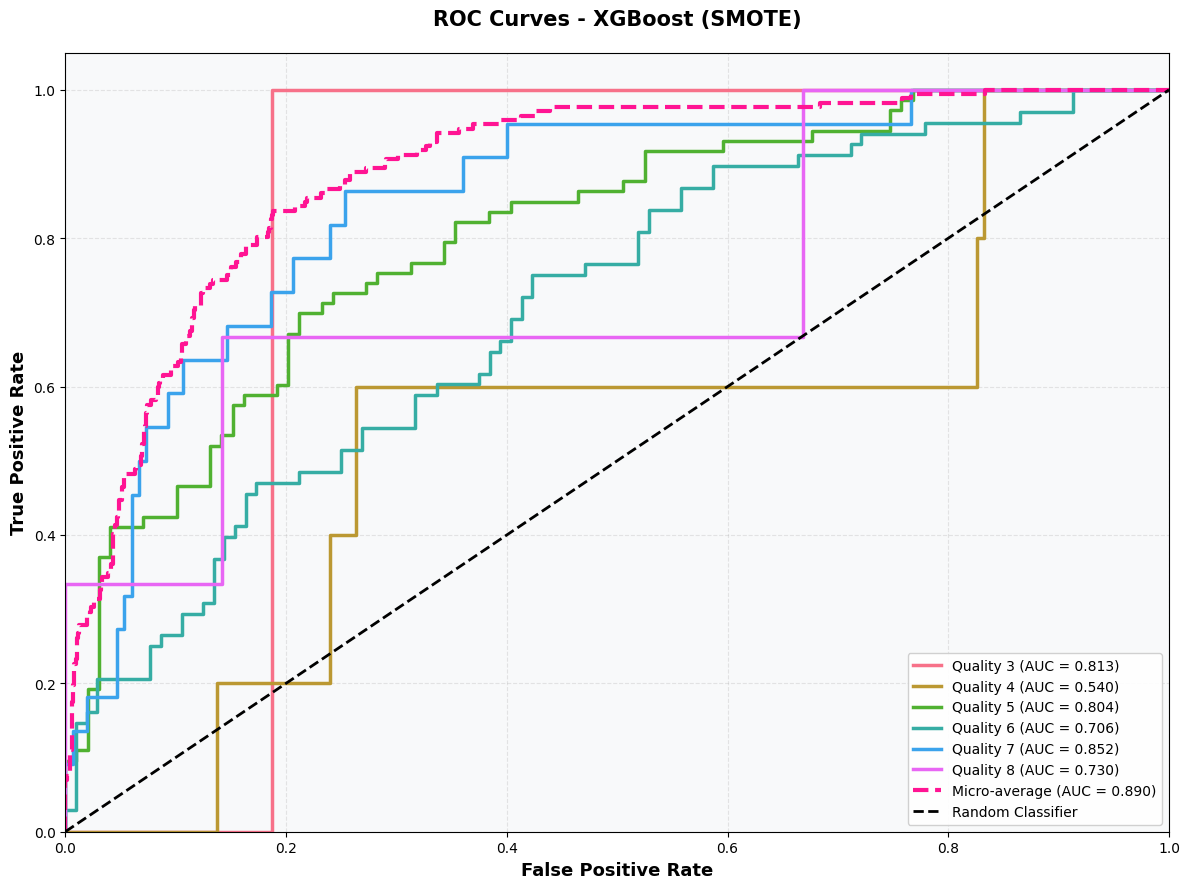


AUC Scores for XGBoost (SMOTE):
  Quality 3: 0.8129
  Quality 4: 0.5401
  Quality 5: 0.8042
  Quality 6: 0.7062
  Quality 7: 0.8521
  Quality 8: 0.7298
  Micro-average: 0.8897
  Macro-average: 0.7409

Plotting ROC curves for RandomForest (SMOTE)...


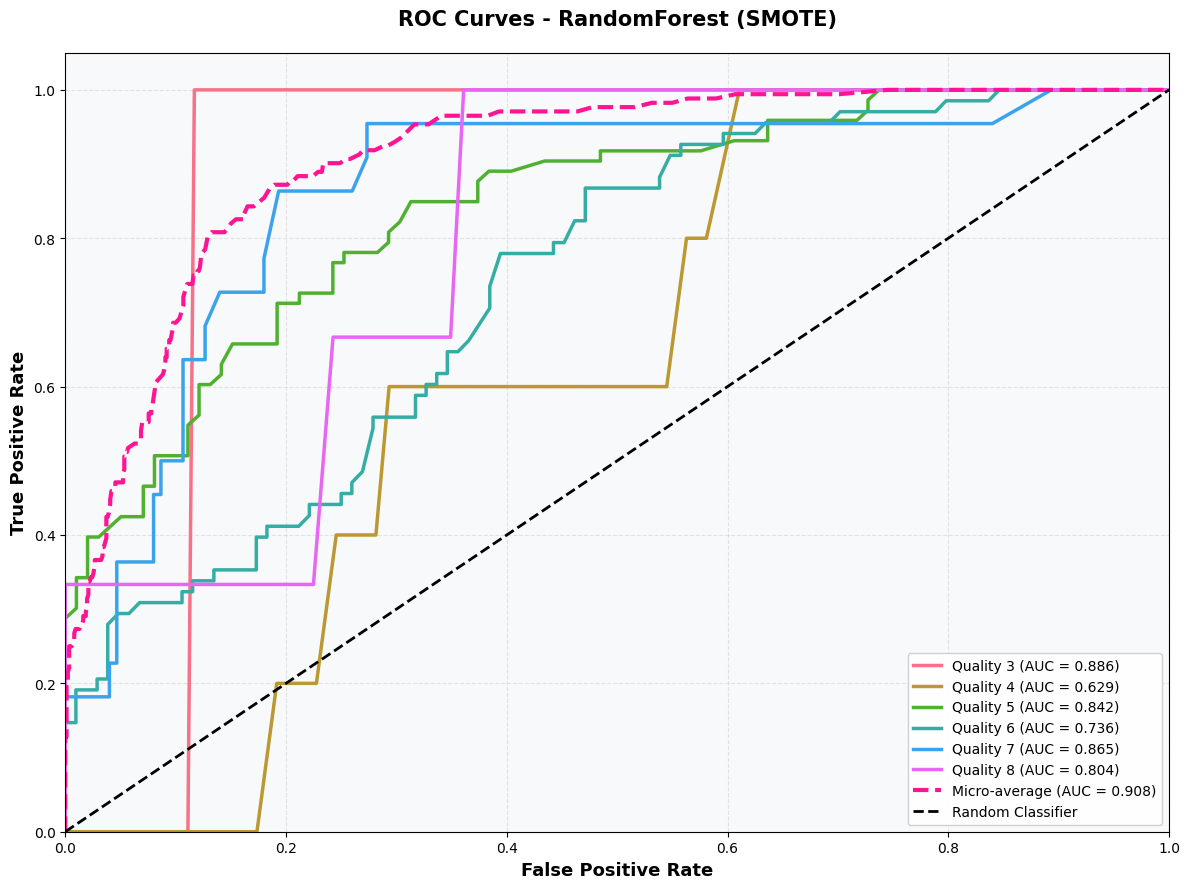


AUC Scores for RandomForest (SMOTE):
  Quality 3: 0.8860
  Quality 4: 0.6287
  Quality 5: 0.8416
  Quality 6: 0.7364
  Quality 7: 0.8652
  Quality 8: 0.8037
  Micro-average: 0.9079
  Macro-average: 0.7936

Plotting ROC curves for SVM (SMOTE)...


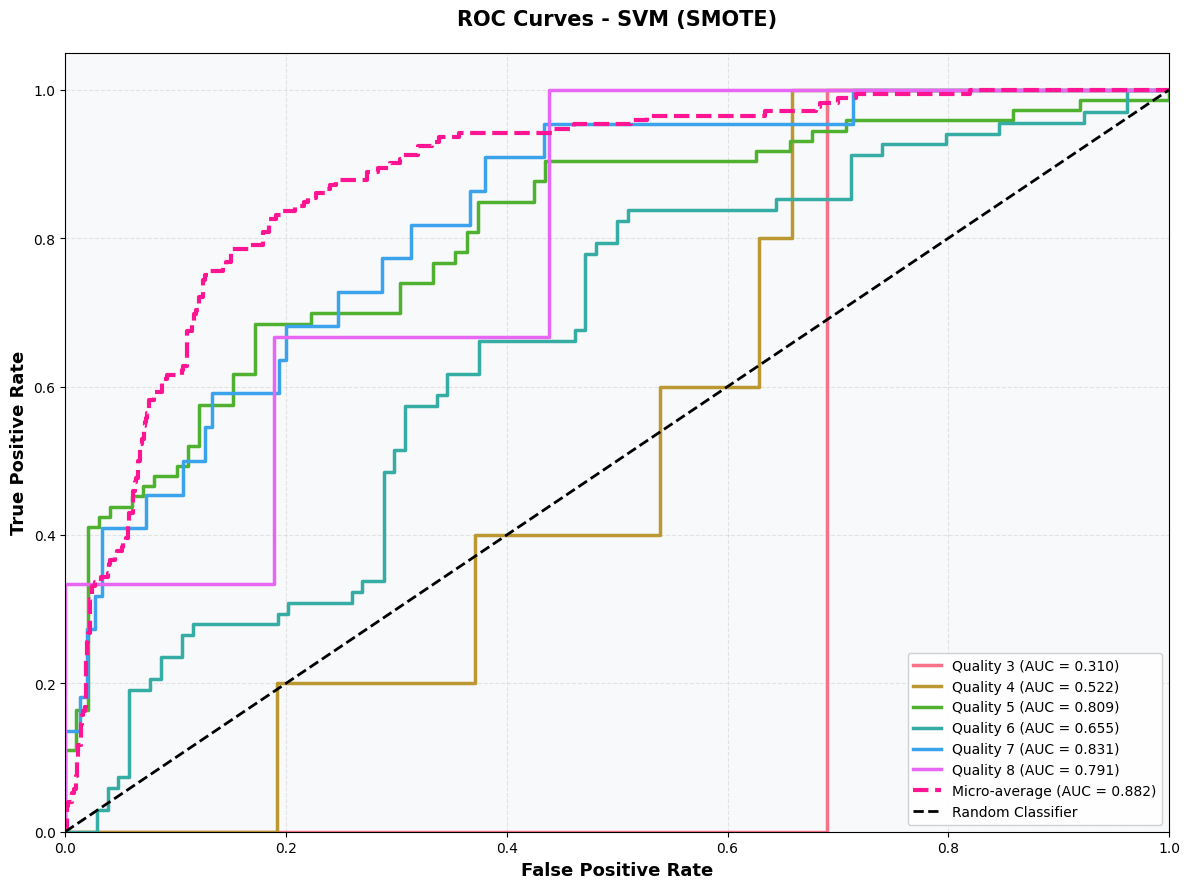


AUC Scores for SVM (SMOTE):
  Quality 3: 0.3099
  Quality 4: 0.5222
  Quality 5: 0.8086
  Quality 6: 0.6547
  Quality 7: 0.8309
  Quality 8: 0.7909
  Micro-average: 0.8821
  Macro-average: 0.6529

Plotting ROC curves for XGBoost (RUS)...


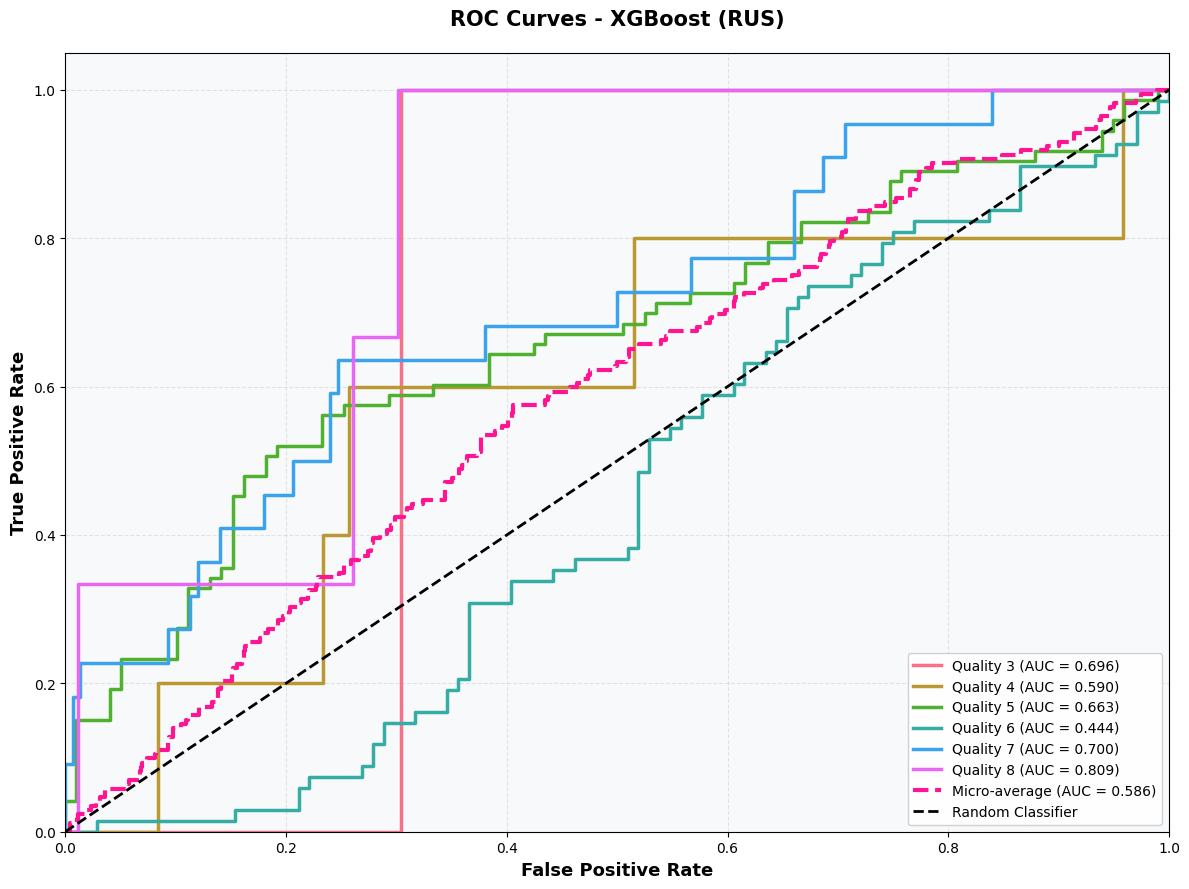


AUC Scores for XGBoost (RUS):
  Quality 3: 0.6959
  Quality 4: 0.5904
  Quality 5: 0.6627
  Quality 6: 0.4443
  Quality 7: 0.6997
  Quality 8: 0.8087
  Micro-average: 0.5859
  Macro-average: 0.6503

Plotting ROC curves for RandomForest (RUS)...


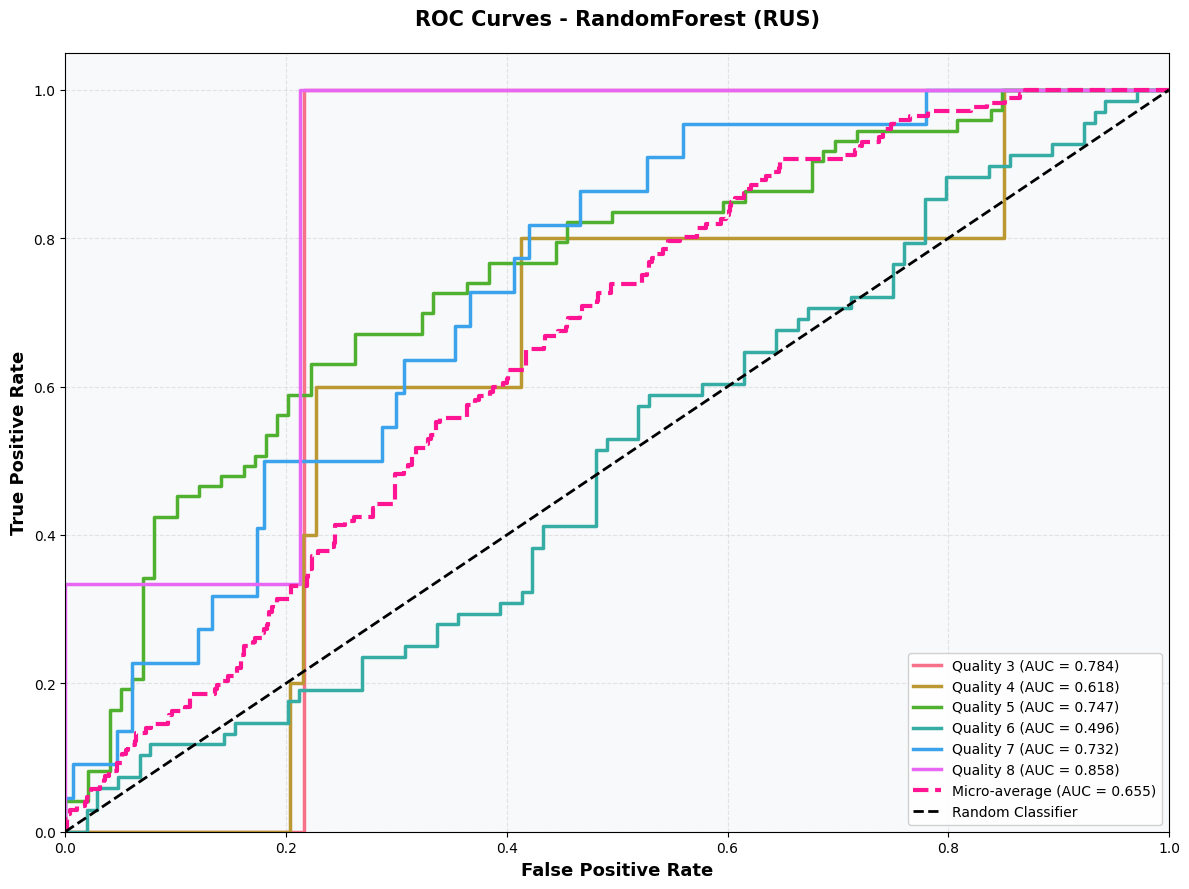


AUC Scores for RandomForest (RUS):
  Quality 3: 0.7836
  Quality 4: 0.6180
  Quality 5: 0.7468
  Quality 6: 0.4965
  Quality 7: 0.7315
  Quality 8: 0.8580
  Micro-average: 0.6549
  Macro-average: 0.7057

Plotting ROC curves for SVM (RUS)...


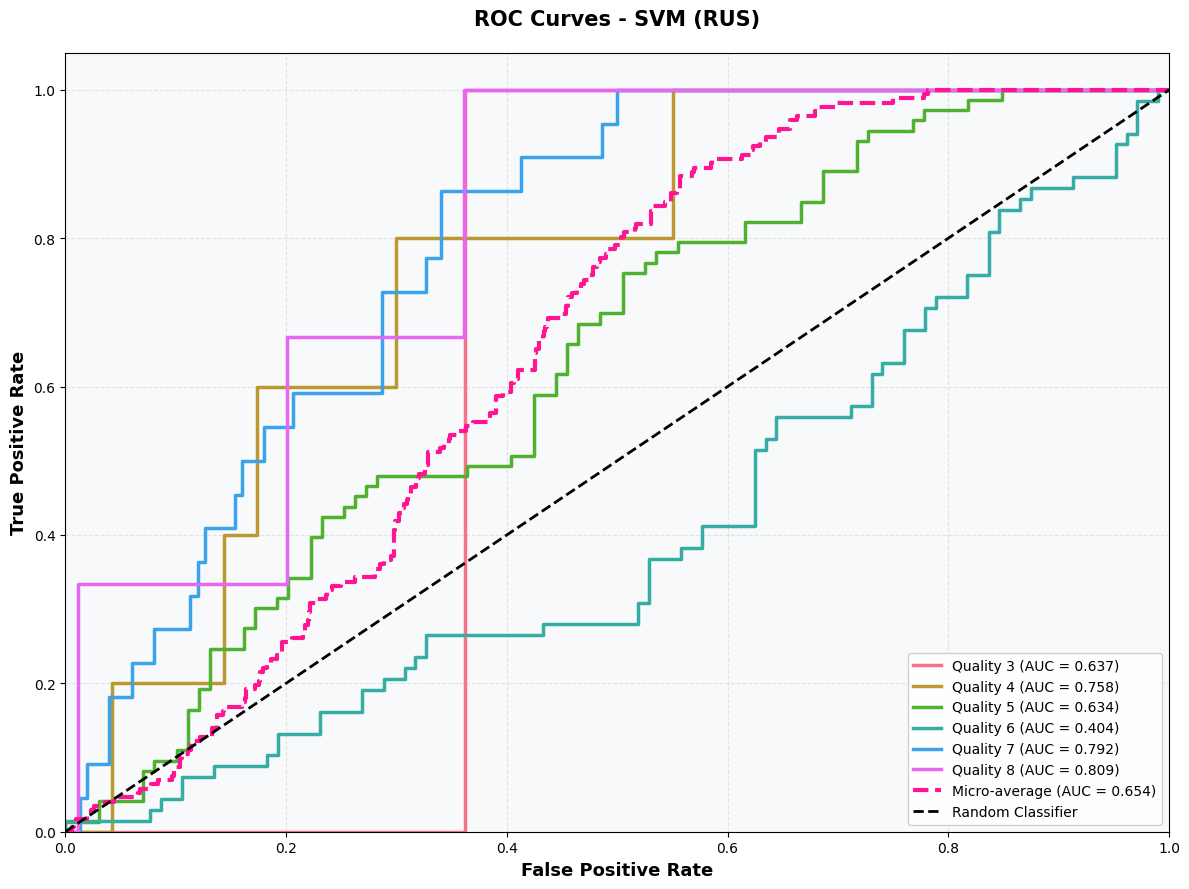


AUC Scores for SVM (RUS):
  Quality 3: 0.6374
  Quality 4: 0.7581
  Quality 5: 0.6344
  Quality 6: 0.4036
  Quality 7: 0.7918
  Quality 8: 0.8087
  Micro-average: 0.6542
  Macro-average: 0.6723


In [26]:
print('\n' + '=' * 50)
print('ROC-AUC ANALYSIS')
print('=' * 50)

# Binarize labels for ROC curve
y_val_bin = label_binarize(y_val_final, classes=range(n_classes))

for model_info in trained_models_list:
    model_name = model_info['name']
    y_pred_proba = model_info['y_pred_proba']

    print(f'\nPlotting ROC curves for {model_name}...')

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr['micro'], tpr['micro'], _ = roc_curve(y_val_bin.ravel(),
                                               y_pred_proba.ravel())
    roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

    # Plot ROC curves
    fig, ax = plt.subplots(figsize=(12, 9))

    colors = cycle(sns.color_palette('husl', n_classes))

    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'Quality {i + label_map_to_zero} (AUC = {roc_auc[i]:.3f})')

    # Plot micro-average ROC curve
    ax.plot(fpr['micro'], tpr['micro'],
            label=f'Micro-average (AUC = {roc_auc['micro']:.3f})',
            color='deeppink', linestyle='--', linewidth=3)

    # Plot diagonal
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
    ax.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
    ax.set_title(f'ROC Curves - {model_name}',
                fontsize=15, fontweight='bold', pad=20)
    ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
    ax.grid(alpha=0.3, linestyle='--')
    ax.set_facecolor('#f8f9fa')

    plt.tight_layout()
    plt.show()

    # Print AUC scores
    print(f'\nAUC Scores for {model_name}:')
    for i in range(n_classes):
        print(f'  Quality {i + label_map_to_zero}: {roc_auc[i]:.4f}')
    print(f'  Micro-average: {roc_auc['micro']:.4f}')
    print(f'  Macro-average: {np.mean([roc_auc[i] for i in range(n_classes)]):.4f}')

1. Models Trained on Original_Scaled Dataset:

* RandomForest (Original_Scaled):
Micro-average AUC: 0.9145
Macro-average AUC: 0.7975
This model shows the highest Macro-average AUC among all models, suggesting it performs relatively well across all classes, even the minority ones, on the original (scaled) data. Individual class AUCs are generally good, with Quality 3 and 8 having slightly lower scores, possibly due to their very small presence.
* SVM (Original_Scaled):
Micro-average AUC: 0.9024
Macro-average AUC: 0.7849
Similar strong performance to RandomForest, indicating SVM can also learn good decision boundaries on the original data.
* XGBoost (Original_Scaled):
Micro-average AUC: 0.8943
Macro-average AUC: 0.7701
A good performer, but slightly lower macro-average compared to RandomForest and SVM on the original data.

RandomForest and SVM perform best in terms of macro-average AUC, indicating better overall balance in classification across all quality levels, despite the class imbalance.

2. Models Trained on SMOTE Dataset:

* RandomForest (SMOTE):
Micro-average AUC: 0.9079
Macro-average AUC: 0.7936
This model maintains a very strong performance, very close to RandomForest on Original_Scaled. SMOTE helped improve some individual class AUCs compared to original, especially for lower-frequency classes, but the overall macro-average remains similar or slightly lower than the best 'Original_Scaled' model.
* XGBoost (SMOTE):
Micro-average AUC: 0.8897
Macro-average AUC: 0.7409
While SMOTE helped boost the CV accuracy during tuning, its validation AUC (especially macro-average) is lower than the best models on Original_Scaled. This can sometimes happen if SMOTE creates synthetic samples that make the model overfit the synthetic data, leading to slightly worse generalization on real (validation) data.
* SVM (SMOTE):
Micro-average AUC: 0.8821
Macro-average AUC: 0.6529
This model shows a notable drop in macro-average AUC compared to SVM on Original_Scaled, particularly struggling with 'Quality 3' (AUC 0.3099), indicating that SMOTE might not have been beneficial for SVM in handling the most infrequent class.

While SMOTE improved tuning scores, its impact on validation AUC varies. RandomForest shows robust performance, but XGBoost and SVM's macro-average AUCs are generally lower or comparable to their Original_Scaled counterparts, with SVM performing notably worse for the most imbalanced class after SMOTE.

3. Models Trained on RUS Dataset:

* RandomForest (RUS):
Micro-average AUC: 0.6549
Macro-average AUC: 0.7057
* SVM (RUS):
Micro-average AUC: 0.6542
Macro-average AUC: 0.6723
* XGBoost (RUS):
Micro-average AUC: 0.5859
Macro-average AUC: 0.6503

All models trained with Random UnderSampling (RUS) show significantly lower Micro-average and Macro-average AUC scores compared to Original_Scaled and SMOTE. This indicates that removing a large number of majority class samples (as RUS does) can lead to a significant loss of information and poorer generalization on the validation set, especially given the already small size of the dataset. Their performance is closer to random guessing for many classes.

The ROC-AUC analysis, particularly focusing on the Macro-average AUC (which is more sensitive to imbalanced classes), suggests that RandomForest and SVM trained on the Original_Scaled dataset (without oversampling or undersampling) generally provide the best and most balanced classification performance across all wine quality classes. SMOTE improved some individual class scores but did not consistently lead to better overall macro-average AUC on the validation set, and RUS significantly degraded performance. The visual ROC curves also reinforce this, showing broader curves closer to the top-left corner for the better-performing models.



#12. Model Comparison

The following code is used to compare all of the models that we trained in previous section using bar plot.


MODEL COMPARISON


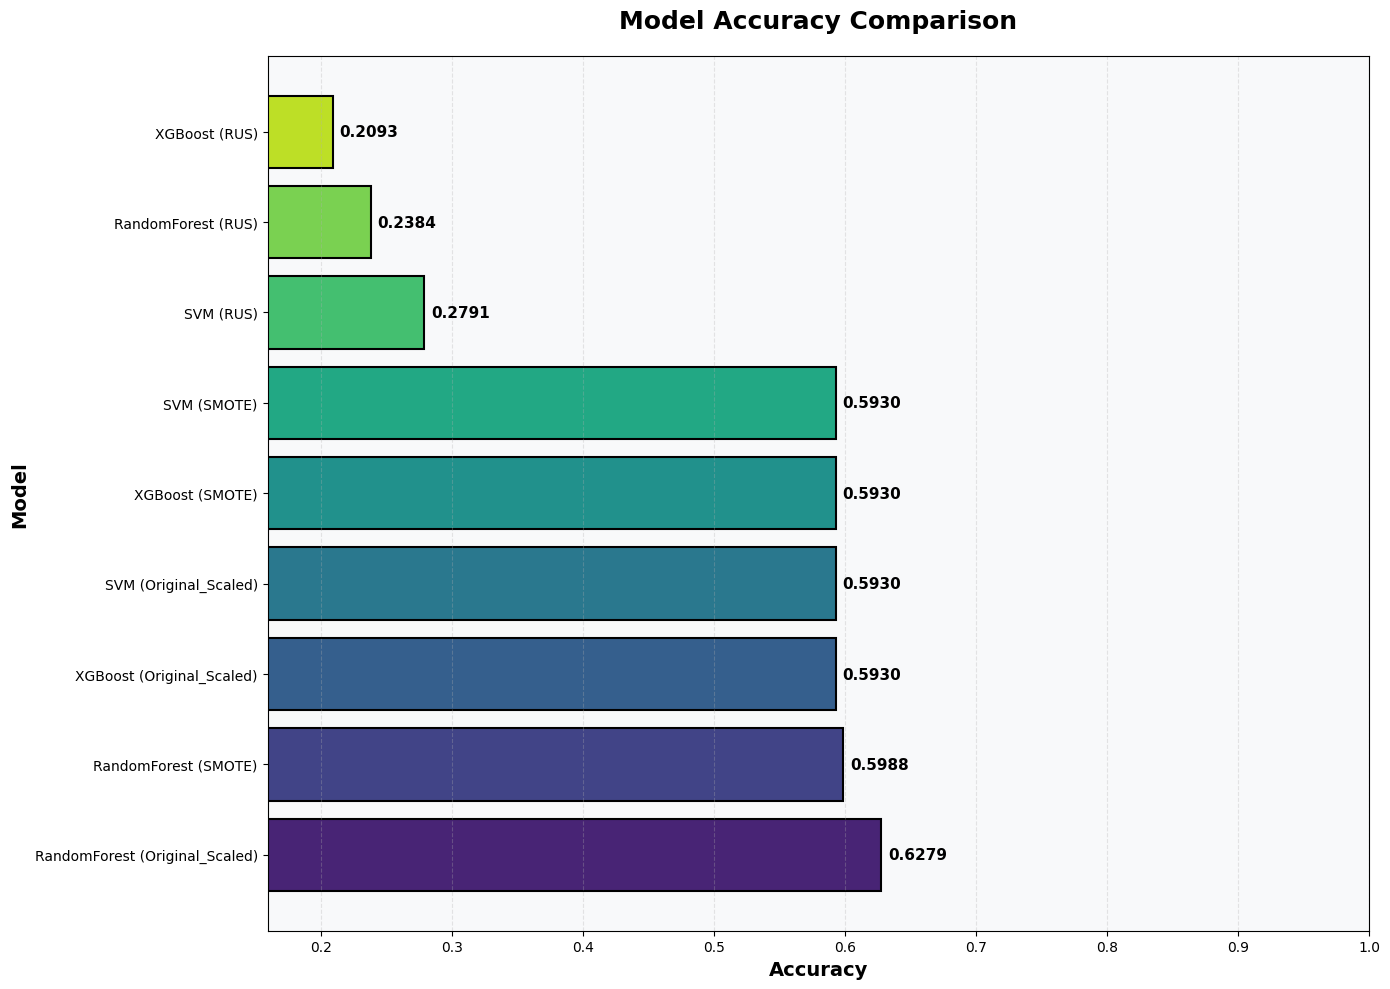

In [27]:
print('\n' + '=' * 50)
print('MODEL COMPARISON')
print('=' * 50)

df_results = pd.DataFrame(trained_models_list)

# Enhanced Accuracy Comparison Plot
fig, ax = plt.subplots(figsize=(14, 10))
df_sorted_acc = df_results.sort_values('accuracy', ascending=False)

colors_bar = sns.color_palette('viridis', len(df_sorted_acc))
bars = ax.barh(df_sorted_acc['name'], df_sorted_acc['accuracy'],
               color=colors_bar, edgecolor='black', linewidth=1.5)

ax.set_title('Model Accuracy Comparison', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_xlim([max(0, df_results['accuracy'].min() - 0.05), 1.0])
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_facecolor('#f8f9fa')

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, df_sorted_acc['accuracy'])):
    ax.text(acc + 0.005, bar.get_y() + bar.get_height()/2,
            f'{acc:.4f}',
            va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

We know that the best model is RandomForest in original dataset (with standardization) with 0.6279 accuracy score along with RandomForest in oversampling test with 0.5988 accuracy score in the 2nd. We will rank all of the models accuracy in the next section.

#13. Making Predictions on Unlabeled Dataset

The following code is used to rank all the best models and predict on unlabeled dataset.


MAKING PREDICTIONS
Ranking Models by Validation Accuracy:
1. RandomForest (Original_Scaled) - Accuracy: 0.6279
2. RandomForest (SMOTE) - Accuracy: 0.5988
3. XGBoost (Original_Scaled) - Accuracy: 0.5930
4. SVM (Original_Scaled) - Accuracy: 0.5930
5. XGBoost (SMOTE) - Accuracy: 0.5930
6. SVM (SMOTE) - Accuracy: 0.5930
7. SVM (RUS) - Accuracy: 0.2791
8. RandomForest (RUS) - Accuracy: 0.2384
9. XGBoost (RUS) - Accuracy: 0.2093
Best Model 1: RandomForest (Original_Scaled) (Accuracy: 0.6279)
Best Model 2: RandomForest (SMOTE) (Accuracy: 0.5988)
Best Model 3: XGBoost (Original_Scaled) (Accuracy: 0.5930)
Best Model 4: SVM (Original_Scaled) (Accuracy: 0.5930)
Best Model 5: XGBoost (SMOTE) (Accuracy: 0.5930)
Submission using RandomForest (Original_Scaled):
     Id  Quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        5
5  1120        6
6   180        6
7    82        5
8   632        6
9   592        5
Submission using RandomForest (SMOTE):
     Id  Quality

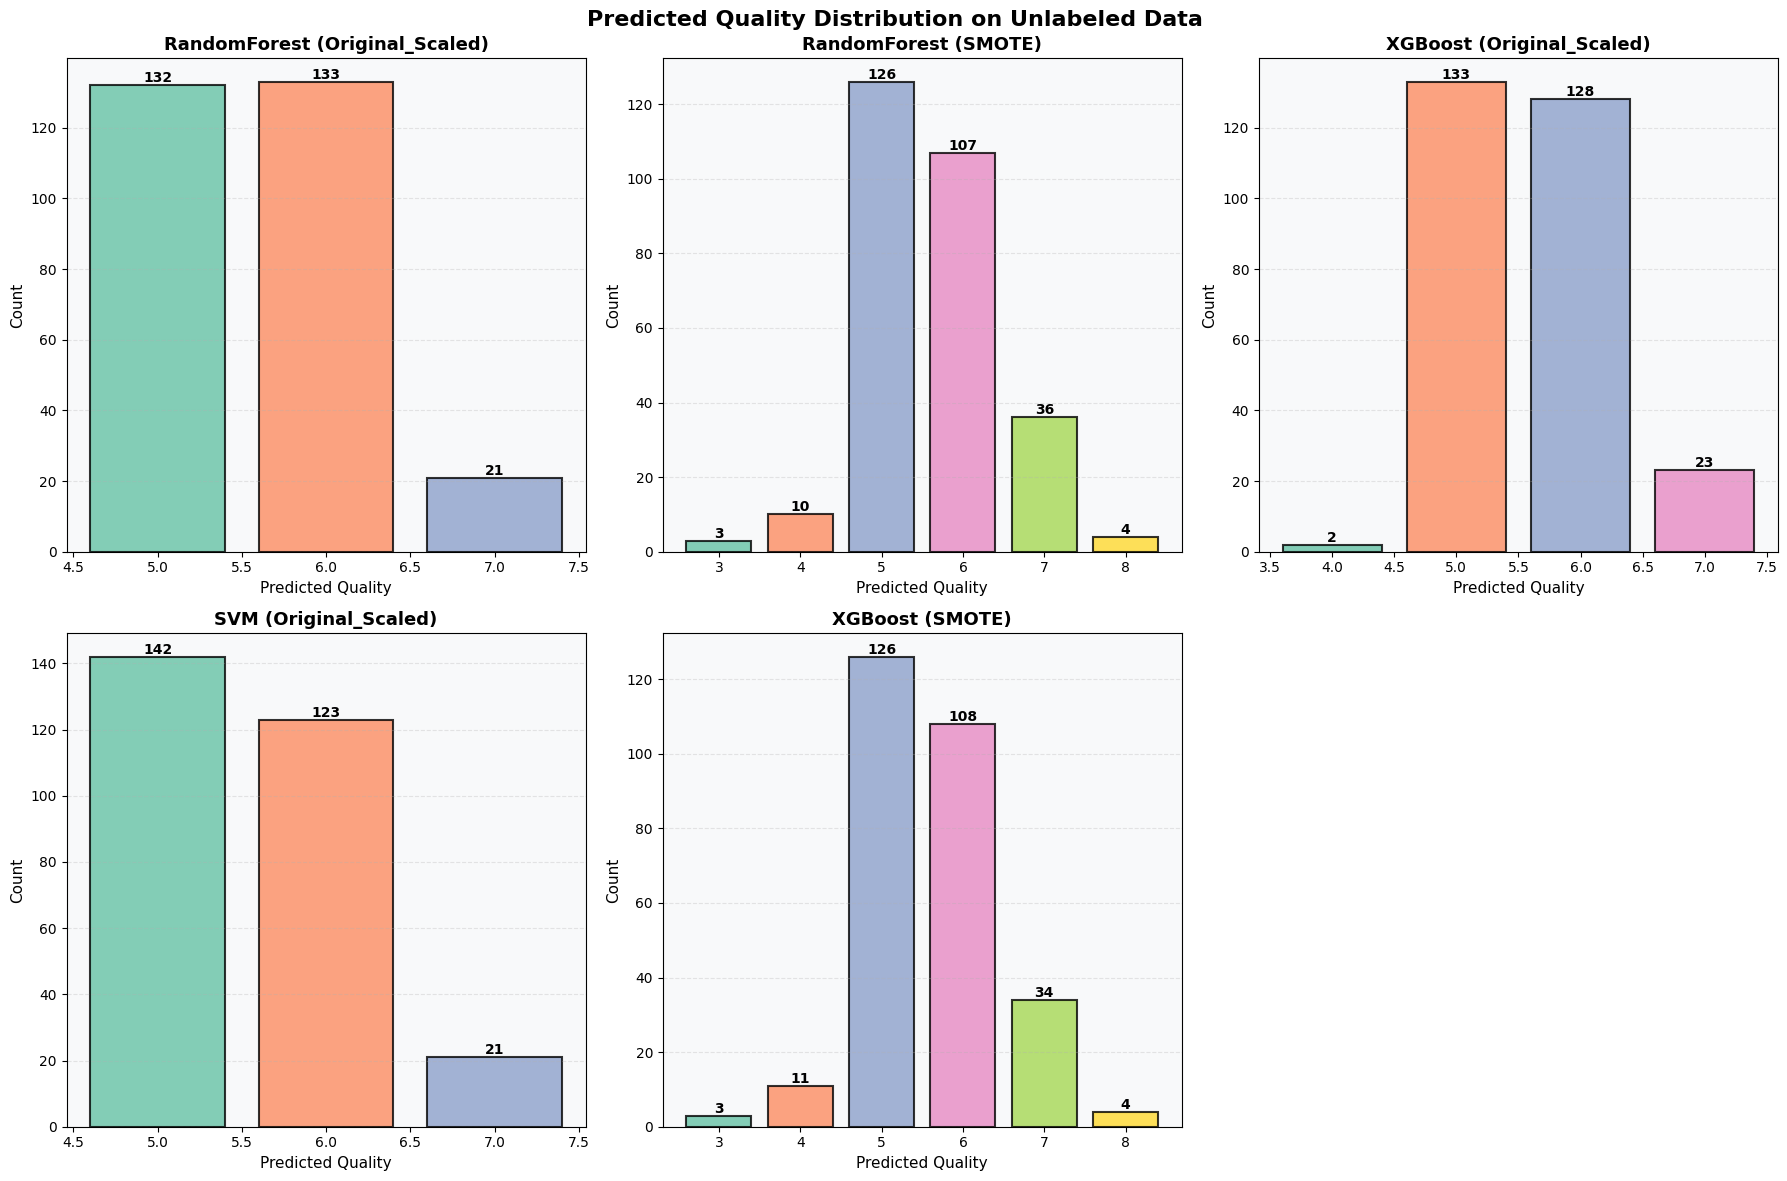

In [28]:
print('\n' + '=' * 50)
print('MAKING PREDICTIONS')
print('=' * 50)

best_models_list = sorted(trained_models_list, key=lambda x: x['accuracy'],
                          reverse=True)

print('Ranking Models by Validation Accuracy:')
for i, model_info in enumerate(best_models_list):
    print(f'{i+1}. {model_info['name']} - Accuracy: {model_info['accuracy']:.4f}')

best_model_1 = best_models_list[0]
best_model_2 = best_models_list[1]
best_model_3 = best_models_list[2]
best_model_4 = best_models_list[3]
best_model_5 = best_models_list[4]

print('='*50)
print(f'Best Model 1: {best_model_1['name']} (Accuracy: {best_model_1['accuracy']:.4f})')
print(f'Best Model 2: {best_model_2['name']} (Accuracy: {best_model_2['accuracy']:.4f})')
print(f'Best Model 3: {best_model_3['name']} (Accuracy: {best_model_3['accuracy']:.4f})')
print(f'Best Model 4: {best_model_4['name']} (Accuracy: {best_model_4['accuracy']:.4f})')
print(f'Best Model 5: {best_model_5['name']} (Accuracy: {best_model_5['accuracy']:.4f})')
print('='*50)

model1 = best_model_1['model']
model2 = best_model_2['model']
model3 = best_model_3['model']
model4 = best_model_4['model']
model5 = best_model_5['model']

pred_unlabeled_1_mapped = model1.predict(X_unlabeled_scaled)
pred_unlabeled_2_mapped = model2.predict(X_unlabeled_scaled)
pred_unlabeled_3_mapped = model3.predict(X_unlabeled_scaled)
pred_unlabeled_4_mapped = model4.predict(X_unlabeled_scaled)
pred_unlabeled_5_mapped = model5.predict(X_unlabeled_scaled)

pred_unlabeled_1_original = [label + label_map_to_zero for label in pred_unlabeled_1_mapped]
pred_unlabeled_2_original = [label + label_map_to_zero for label in pred_unlabeled_2_mapped]
pred_unlabeled_3_original = [label + label_map_to_zero for label in pred_unlabeled_3_mapped]
pred_unlabeled_4_original = [label + label_map_to_zero for label in pred_unlabeled_4_mapped]
pred_unlabeled_5_original = [label + label_map_to_zero for label in pred_unlabeled_5_mapped]

submission1_df = pd.DataFrame({
    'Id': df_unlabeled['Id'],
    'Quality': pred_unlabeled_1_original
})

submission2_df = pd.DataFrame({
    'Id': df_unlabeled['Id'],
    'Quality': pred_unlabeled_2_original
})
submission3_df = pd.DataFrame({
    'Id': df_unlabeled['Id'],
    'Quality': pred_unlabeled_3_original
})
submission4_df = pd.DataFrame({
    'Id': df_unlabeled['Id'],
    'Quality': pred_unlabeled_4_original
})
submission5_df = pd.DataFrame({
    'Id': df_unlabeled['Id'],
    'Quality': pred_unlabeled_5_original
})

print('='*50)
print(f'Submission using {best_model_1['name']}:')
print(submission1_df.head(10))
print('='*50)
print(f'Submission using {best_model_2['name']}:')
print(submission2_df.head(10))
print('='*50)
print(f'Submission using {best_model_3['name']}:')
print(submission3_df.head(10))
print('='*50)
print(f'Submission using {best_model_4['name']}:')
print(submission4_df.head(10))
print('='*50)
print(f'Submission using {best_model_5['name']}:')
print(submission5_df.head(10))
print('='*50)

# Visualize prediction distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Predicted Quality Distribution on Unlabeled Data',
             fontsize=16, fontweight='bold')

axes_flat = axes.flatten()

predictions_to_plot = [
    (pred_unlabeled_1_original, best_model_1['name']),
    (pred_unlabeled_2_original, best_model_2['name']),
    (pred_unlabeled_3_original, best_model_3['name']),
    (pred_unlabeled_4_original, best_model_4['name']),
    (pred_unlabeled_5_original, best_model_5['name'])
]

for i, (predictions, model_name) in enumerate(predictions_to_plot):
    ax = axes_flat[i]
    pred_counts = pd.Series(predictions).value_counts().sort_index()
    colors_pred = sns.color_palette('Set2', len(pred_counts))

    bars = ax.bar(pred_counts.index, pred_counts.values,
                  color=colors_pred, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax.set_title(f'{model_name}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Predicted Quality', fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_facecolor('#f8f9fa')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Hide any unused subplots
for i in range(len(predictions_to_plot), len(axes_flat)):
    axes_flat[i].axis('off')

plt.tight_layout()
plt.show()

Here are the models with the best validation accuracy:
1. RandomForest (Original_Scaled) - Accuracy: 0.6279
2. RandomForest (SMOTE) - Accuracy: 0.5988
3. XGBoost (Original_Scaled) - Accuracy: 0.5930
4. SVM (Original_Scaled) - Accuracy: 0.5930
5. XGBoost (SMOTE) - Accuracy: 0.5930
6. SVM (SMOTE) - Accuracy: 0.5930
7. SVM (RUS) - Accuracy: 0.2791
8. RandomForest (RUS) - Accuracy: 0.2384
9. XGBoost (RUS) - Accuracy: 0.2093

We used the best five models to predict the unlabeled dataset.

In the predicted quality distribution plot, we know that the models that use the original dataset just learning the higher quality (5, 6, 7). This could be happen because they have the high number of data. But the models that use the oversampling test can learn all the quality (3,4,5,6,7,8) label since in the dataset we have equal number of quality distribution.

For the results, we will use the best model which is Random Forest in the original dataset even though it just has 5,6,7 quality prediction because probably all of the specified wines have an average quality of 5-7.

#14. Export Results

In [29]:
submission1_df.to_csv(f'{best_model_1['name']}.csv', index=False)
submission2_df.to_csv(f'{best_model_2['name']}.csv', index=False)
submission3_df.to_csv(f'{best_model_3['name']}.csv', index=False)
submission4_df.to_csv(f'{best_model_4['name']}.csv', index=False)
submission5_df.to_csv(f'{best_model_5['name']}.csv', index=False)